## Problem Statement


The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_rel

from scipy.stats import shapiro  # for checking normality

from scipy.stats import ttest_rel  # paired t-test

from sklearn.preprocessing import OneHotEncoder  # One hot encoding categorical variable

from sklearn.preprocessing import MinMaxScaler  # column normalization

from sklearn.preprocessing import StandardScaler  # column standardization


In [2]:
df = pd.read_csv('C:/Users/hp/Downloads/delhivery_data.csv')

In [3]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [4]:

df.shape


(144867, 24)

In [5]:
# removing the unknown field

df.drop(['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis=1,inplace =True)


In [6]:

df.dtypes


data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
dtype: object

In [7]:
# converting datetime
date_time_cols = ['trip_creation_time','od_start_time','od_end_time']

for col in date_time_cols:
    df[col] = df[col].astype('datetime64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [9]:
# checking missing values
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [10]:
# checking missing values
print('There are {:.1f} % null values present in the data'.format(df.isna().sum().sum() / (len(df)) *100))

There are 0.4 % null values present in the data


### Handling Missing Values

In [11]:
# checking the rows with null values
#df[(df['source_name'].isnull()) | (df['destination_name'].isnull())]

There are less than 1% null values present in the data. The null values present are in source_name and destination_name. The null values will be filled with source_center and destination_center respectively.

In [12]:
# filling the null values
df['source_name'].fillna(df['source_center'],inplace= True)

In [13]:
# filling the null values
df['destination_name'].fillna(df['destination_center'],inplace= True)

Now, grouping data to represent each row for each trip id.

In [14]:
# grouping
df1 = df.groupby(['data','trip_creation_time','trip_uuid','route_type',
            'source_center','source_name',
            'destination_center','destination_name']).agg(
            { 'od_start_time' : 'first',
             'od_end_time' : 'last',
             'start_scan_to_end_scan' : 'last',
             'actual_distance_to_destination' : 'max',
             'actual_time' : 'max',
             'osrm_time' : 'max',
             'osrm_distance' : 'max',
             'segment_actual_time' : 'sum',
             'segment_osrm_time' : 'sum',
             'segment_osrm_distance' : 'sum'}
             ).sort_values(by = ['trip_uuid','od_start_time']).reset_index()

# grouping on data, trip creation, trip_uuid, route_type

df1 = df1.groupby(['data','trip_creation_time','trip_uuid','route_type']).agg(
            {'source_center' : 'first',
             'source_name' : 'first',
             'destination_center' : 'last',
             'destination_name' : 'last',
             'od_start_time' : 'first',
             'od_end_time' : 'last',
             'start_scan_to_end_scan' : 'sum',
             'actual_distance_to_destination' : 'sum',
             'actual_time' : 'sum',
             'osrm_time' : 'sum',
             'osrm_distance' : 'sum',
             'segment_actual_time' : 'sum',
             'segment_osrm_time' : 'sum',
             'segment_osrm_distance' : 'sum'}
             ).reset_index()

In [15]:
# Splitting based on space and parenthesis to extract 'State'
df1['destination_state'] = df1['destination_name'].str.split('(').str[1].str.split(')').str[0]

# Splitting based on underscore to extract 'City', 'Place', and 'Code'
df1['destination_city'] = df1['destination_name'].str.split('(').str[0].str.split('_').str[0]
df1['destination_place'] = df1['destination_name'].str.split('(').str[0].str.split('_').str[1]
df1['destination_code'] = df1['destination_name'].str.split('(').str[0].str.split('_').str[2].str.split(' ').str[0]

# filling the null values in destination_place
df1['place2'] = df1['destination_name'].str.split('(').str[0].str.split(' ').str[:2]
df1['place2'] = df1['place2'].apply(lambda x : ' '.join(x))

df1['destination_place'].fillna(df1.place2,inplace=True)

# filling null values in destination_code

df1.destination_code.fillna(df1.destination_name.str.split('(').str[0].str.split('_').str[-1],inplace=True)

# replacing values
df1.destination_code = df1.destination_code.replace({'HBR Layout PC ': 'PC',
                                 'PNQ Rahatani DPC ' : 'DPC',
                                 'PNQ Pashan DPC ' : 'DPC',
                                 'PNQ Vadgaon Sheri DPC ' : 'DPC',})

df1.destination_city = df1.destination_city.replace({'Bengaluru' : 'Bangalore'})

df1.destination_state.fillna(df1['destination_name'],inplace = True)

# drop the original column and not required column
df1.drop(['destination_name','place2'],inplace=True,axis=1)

In [16]:
# Splitting based on space and parenthesis to extract 'State'
df1['source_state'] = df1['source_name'].str.split('(').str[1].str.split(')').str[0]

# Splitting based on underscore to extract 'City', 'Place', and 'Code'
df1['source_city'] = df1['source_name'].str.split('(').str[0].str.split('_').str[0]
df1['source_place'] = df1['source_name'].str.split('(').str[0].str.split('_').str[1]
df1['source_code'] = df1['source_name'].str.split('(').str[0].str.split('_').str[2].str.split(' ').str[0]

# filling null values in source_place

df1['place2'] = df1['source_name'].str.split('(').str[0].str.split(' ').str[:2]
df1['place2'] = df1['place2'].apply(lambda x : ' '.join(x))

df1['source_place'].fillna(df1.place2,inplace=True)

# filling null values in source_code

df1.source_code.fillna(df1.source_name.str.split('(').str[0].str.split('_').str[-1],inplace=True)

df1.source_state.fillna(df1['source_name'],inplace = True)

# replacing values
df1.source_code = df1.source_code.replace({'HBR Layout PC ': 'PC',
                                 'PNQ Rahatani DPC ' : 'DPC',
                                 'PNQ Pashan DPC ' : 'DPC',
                                 'PNQ Vadgaon Sheri DPC ' : 'DPC',})

df1.source_city = df1.source_city.replace({'Bengaluru' : 'Bangalore'})


# drop the original column and not required column
df1.drop(['source_name','place2'],inplace=True,axis=1)

In [17]:
# feature creation
df1['year'] = pd.DatetimeIndex(df1['trip_creation_time']).year
df1['month'] = pd.DatetimeIndex(df1['trip_creation_time']).month
df1['day'] = pd.DatetimeIndex(df1['trip_creation_time']).day
df1['hour'] = pd.DatetimeIndex(df1['trip_creation_time']).hour

df1['od_start_end'] =(df1['od_end_time'] - df1['od_start_time']).astype('timedelta64[m]')

# drop the columns not required
df1.drop(['trip_creation_time','od_start_time','od_end_time'],axis=1,inplace=True)

In [18]:
df1.shape

(14817, 26)

In [19]:
df1.head()

,data,trip_uuid,route_type,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,...,destination_code,source_state,source_city,source_place,source_code,year,month,day,hour,od_start_end
0,test,trip-153800653897073708,Carting,IND424006AAA,IND424101AAA,145.0,54.371063,128.0,41.0,57.5437,...,D,Maharashtra,Dhule,MIDCAvdn,I,2018,9,27,0,145.0
1,test,trip-153800654935210748,Carting,IND400072AAB,IND401104AAA,81.0,17.774611,58.0,17.0,21.7310,...,IP,Maharashtra,Mumbai Hub,Mumbai Hub,Mumbai Hub,2018,9,27,0,81.0
2,test,trip-153800658820968126,FTL,IND302014AAA,IND000000ACB,610.0,196.041263,334.0,163.0,220.8430,...,HB,Rajasthan,Jaipur,Hub,Hub,2018,9,27,0,610.0
3,test,trip-153800659468028518,Carting,IND421302AAF,IND421302AAR,104.0,9.198088,27.0,9.0,11.5549,...,I,Maharashtra,Mumbai,Kalyan,Kalyan,2018,9,27,0,104.0
4,test,trip-153800661729668086,Carting,IND395009AAA,IND395023AAD,228.0,13.411425,132.0,17.0,18.1836,...,I,Gujarat,Surat,Central,D,2018,9,27,0,228.0


In [20]:
df1.dtypes

data                               object
trip_uuid                          object
route_type                         object
source_center                      object
destination_center                 object
start_scan_to_end_scan            float64
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
destination_state                  object
destination_city                   object
destination_place                  object
destination_code                   object
source_state                       object
source_city                        object
source_place                       object
source_code                        object
year                                int64
month                               int64
day                               

In [21]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,14817.0,530.780455,658.652359,23.000000,149.00000,280.000000,637.000000,7898.000000
actual_distance_to_destination,14817.0,164.683253,305.561572,9.002461,22.86003,48.499937,164.853324,2187.483994
actual_time,14817.0,357.143754,561.396157,9.000000,67.00000,149.000000,370.000000,6265.000000
osrm_time,14817.0,162.071202,272.304633,6.000000,29.00000,60.000000,169.000000,2032.000000
osrm_distance,14817.0,205.101357,370.780010,9.072900,30.94180,65.882600,209.300500,2840.081000
segment_actual_time,14817.0,353.892286,556.247965,9.000000,66.00000,147.000000,367.000000,6230.000000
segment_osrm_time,14817.0,180.949787,314.542047,6.000000,31.00000,65.000000,185.000000,2564.000000
segment_osrm_distance,14817.0,223.201161,416.628374,9.072900,32.65450,70.154400,218.802400,3523.632400
year,14817.0,2018.000000,0.000000,2018.000000,2018.00000,2018.000000,2018.000000,2018.000000
month,14817.0,9.120672,0.325757,9.000000,9.00000,9.000000,9.000000,10.000000


In [22]:
df1.describe(include = 'object').T

,count,unique,top,freq
data,14817,2,training,10654
trip_uuid,14817,14817,trip-153800653897073708,1
route_type,14817,2,Carting,8908
source_center,14817,868,IND000000ACB,948
destination_center,14817,956,IND000000ACB,813
destination_state,14817,41,Maharashtra,2591
destination_city,14817,783,Bangalore,1702
destination_place,14817,767,Central,921
destination_code,14817,95,H,3295
source_state,14817,33,Maharashtra,2682


In [23]:
df1.isna().sum()

data                              0
trip_uuid                         0
route_type                        0
source_center                     0
destination_center                0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
destination_state                 0
destination_city                  0
destination_place                 0
destination_code                  0
source_state                      0
source_city                       0
source_place                      0
source_code                       0
year                              0
month                             0
day                               0
hour                              0
od_start_end                      0
dtype: int64

In [24]:
df1.nunique()

data                                  2
trip_uuid                         14817
route_type                            2
source_center                       868
destination_center                  956
start_scan_to_end_scan             2208
actual_distance_to_destination    14801
actual_time                        1853
osrm_time                           830
osrm_distance                     14736
segment_actual_time                1890
segment_osrm_time                  1242
segment_osrm_distance             14754
destination_state                    41
destination_city                    783
destination_place                   767
destination_code                     95
source_state                         33
source_city                         682
source_place                        679
source_code                          86
year                                  1
month                                 2
day                                  22
hour                                 24


In [25]:
bins = [-1,6,12,18,24]
groups = ['Dawn','Morning','Afternoon','Night']

df1['hour'] = pd.cut(df1['hour'],bins,labels=groups)

In [26]:
df1['hour'].value_counts()

Night        5024
Dawn         4854
Afternoon    2996
Morning      1943
Name: hour, dtype: int64

## Univariate Analysis

In [27]:
top_10_states = df1.destination_state.value_counts().index[:10]

In [28]:
top_10_states_data = df1.loc[df1['destination_state'].isin(top_10_states)]

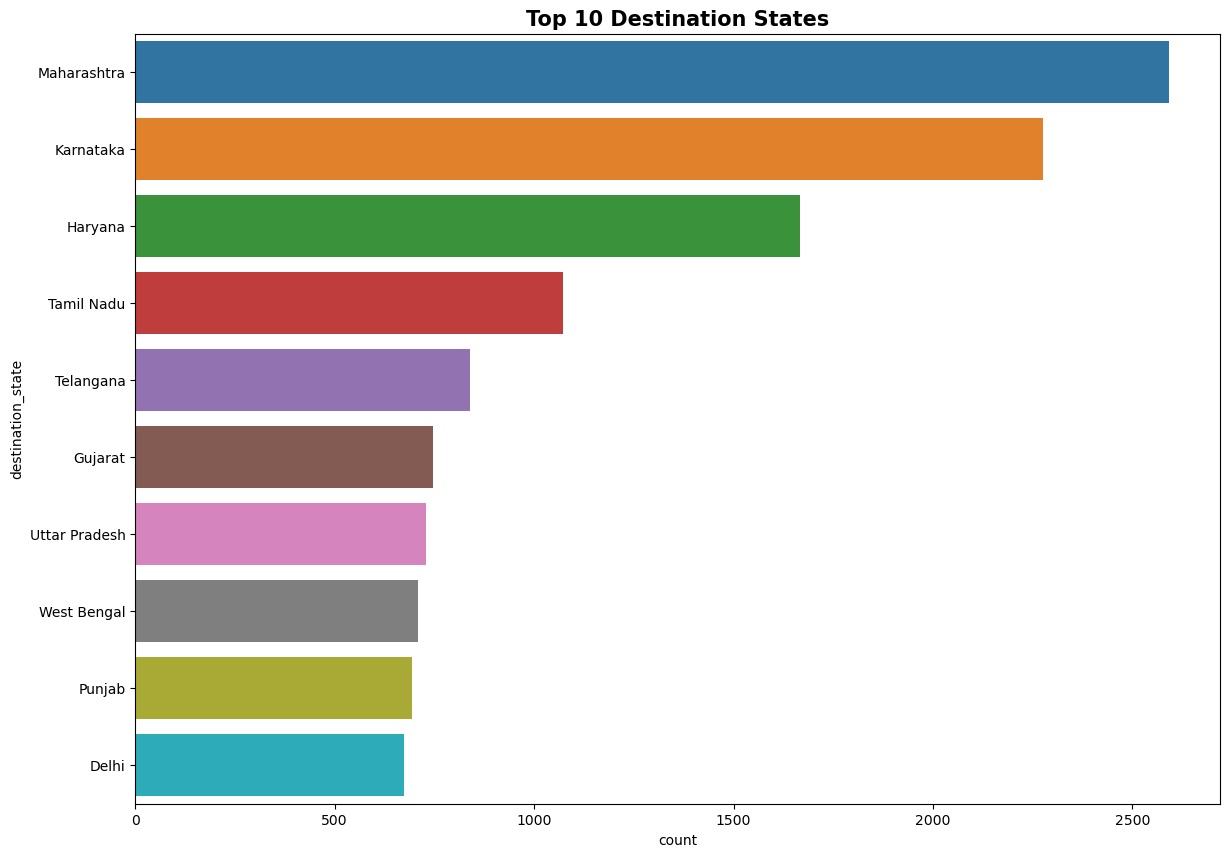

In [29]:
plt.figure(figsize=(14,10))
sns.countplot(data =top_10_states_data,
              y='destination_state', 
              order=top_10_states_data['destination_state'].value_counts().index)
plt.title('Top 10 Destination States',
          fontsize=15,
          loc = 'center',
          fontweight = 'bold')
plt.show()

In [30]:
top_10_states = df1.source_state.value_counts().index[:10]

In [31]:
top_10_states_data = df1.loc[df1['source_state'].isin(top_10_states)]

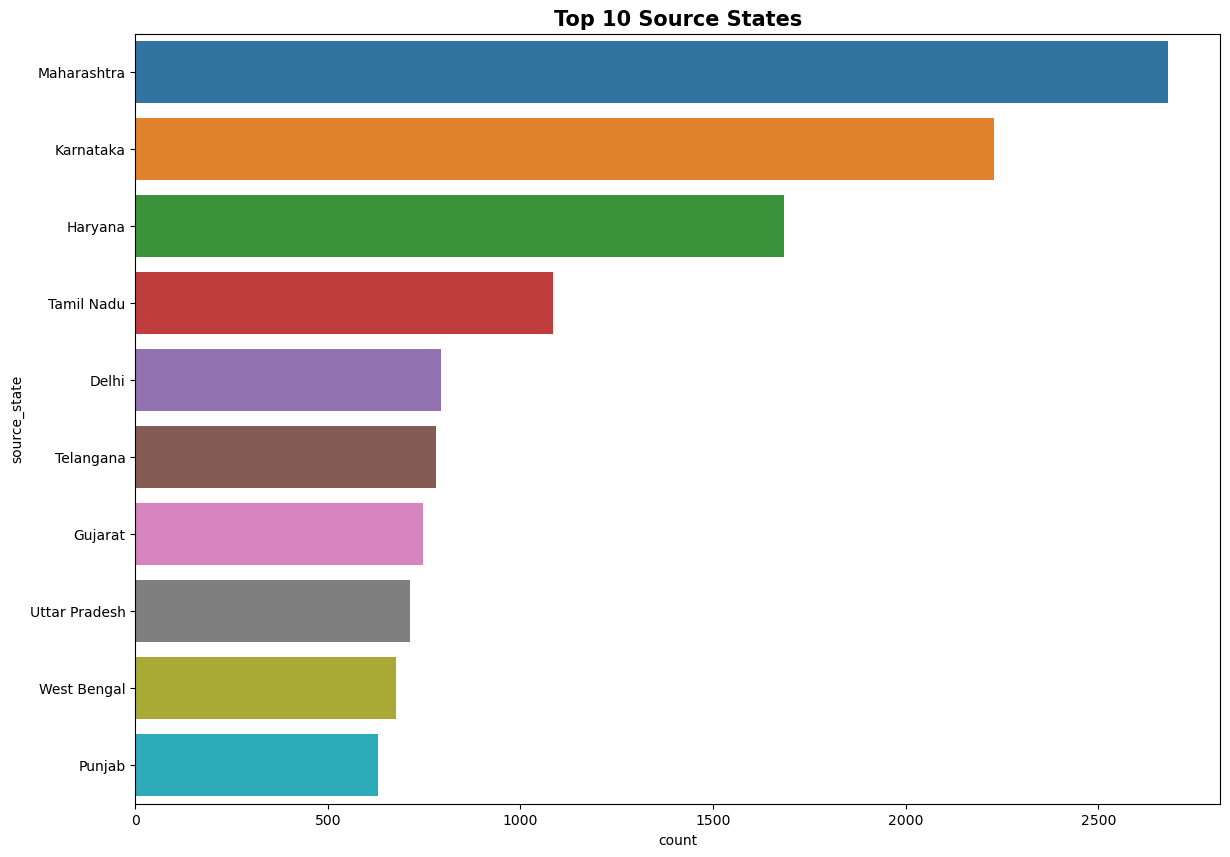

In [32]:
plt.figure(figsize=(14,10))
sns.countplot(data =top_10_states_data,
              y='source_state', 
              order=top_10_states_data['source_state'].value_counts().index)
plt.title('Top 10 Source States',
          fontsize=15,
          loc = 'center',
          fontweight = 'bold')
plt.show()

In [33]:
top_10_cities = df1.destination_city.value_counts().index[:10]

In [34]:
top_10_city_data = df1.loc[df1['destination_city'].isin(top_10_cities)]

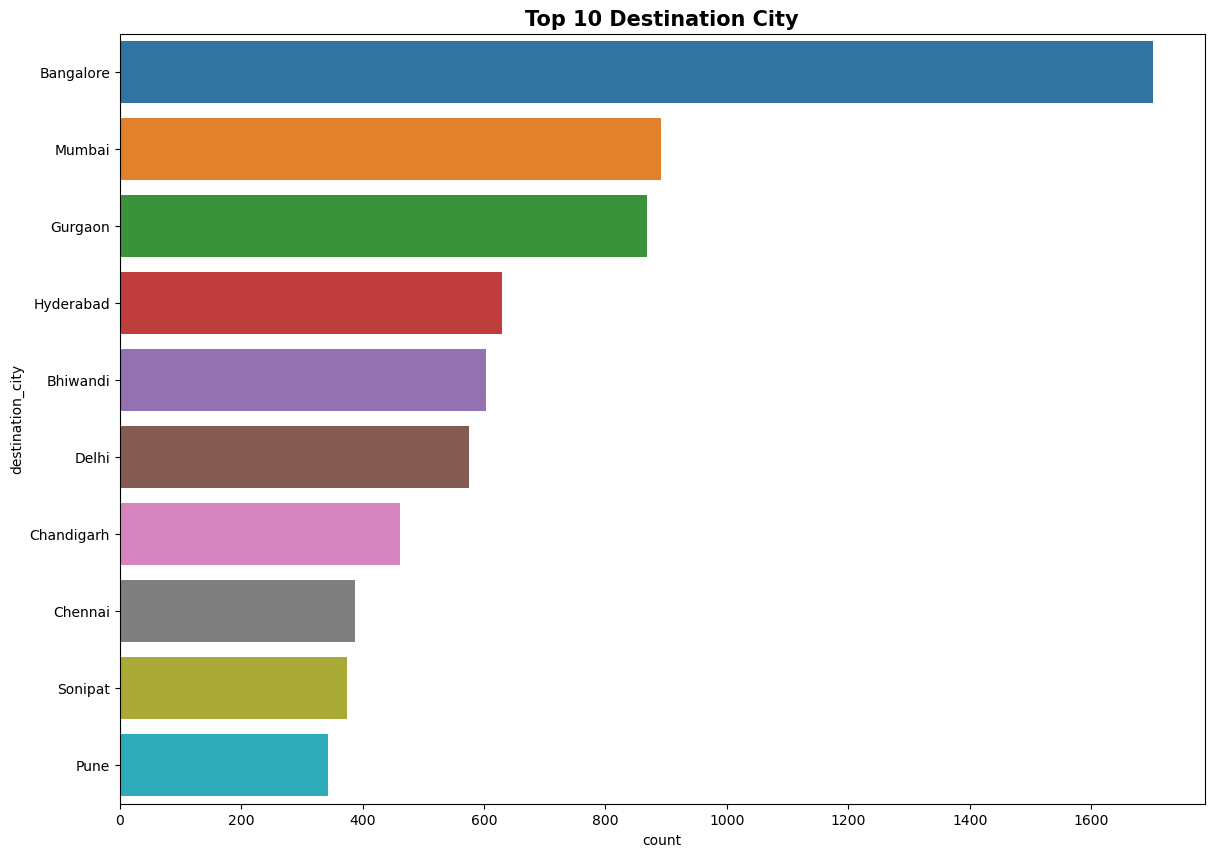

In [35]:
plt.figure(figsize=(14,10))
sns.countplot(data =top_10_city_data,
              y='destination_city', 
              order=top_10_city_data['destination_city'].value_counts().index)
plt.title('Top 10 Destination City',
          fontsize=15,
          loc = 'center',
          fontweight = 'bold')
plt.show()

In [36]:
top_10_cities = df1.source_city.value_counts().index[:10]

In [37]:
top_10_city_data = df1.loc[df1['source_city'].isin(top_10_cities)]

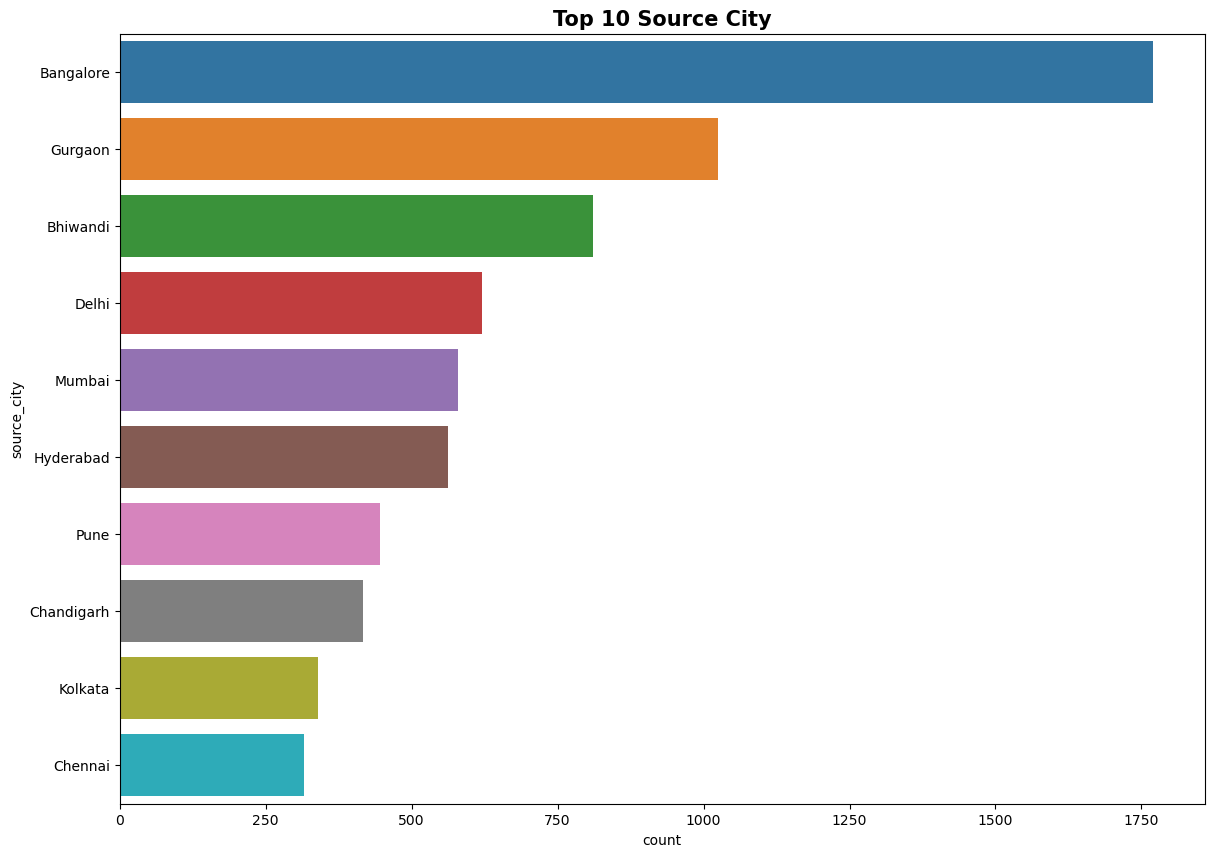

In [38]:
plt.figure(figsize=(14,10))
sns.countplot(data =top_10_city_data,
              y='source_city', 
              order=top_10_city_data['source_city'].value_counts().index)
plt.title('Top 10 Source City',
          fontsize=15,
          loc = 'center',
          fontweight = 'bold')
plt.show()

In [39]:
df1_day = df1.groupby('day')['trip_uuid'].count().to_frame().reset_index()

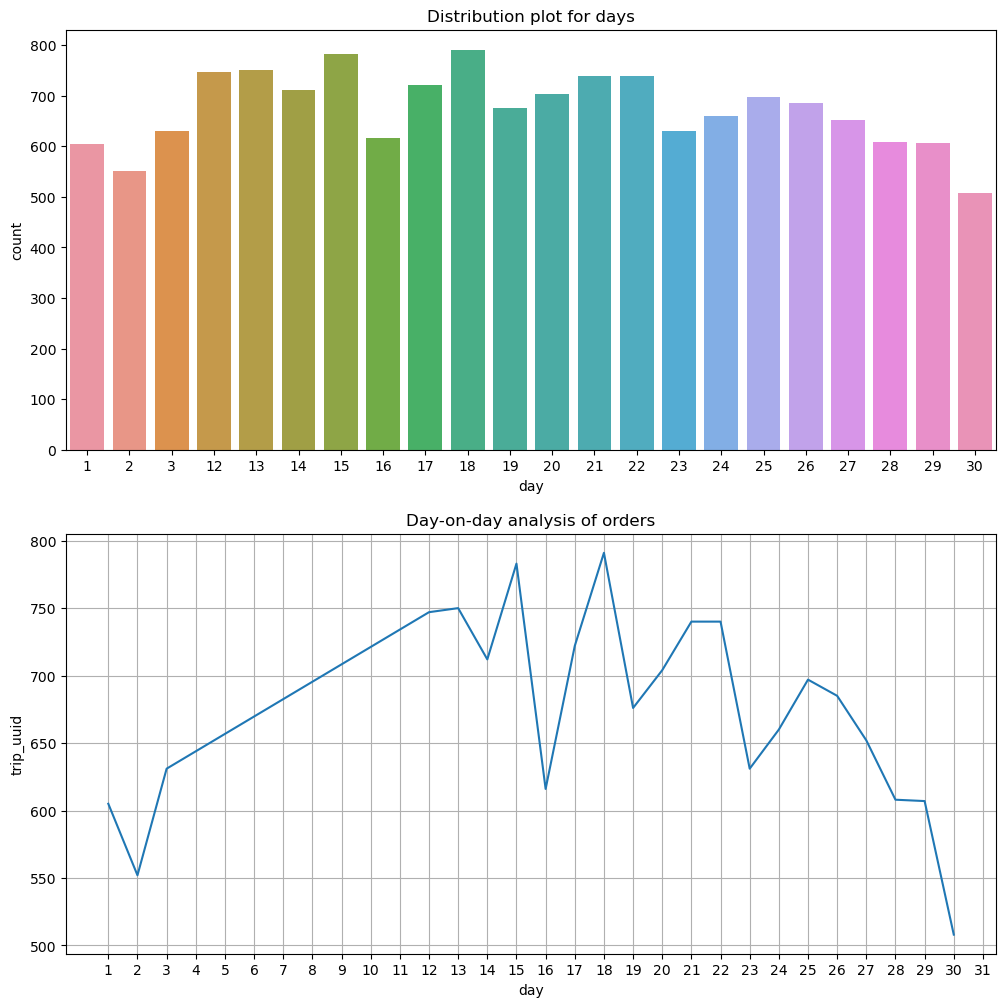

In [40]:
fig = plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
sns.countplot(data = df1, x = 'day')
plt.title('Distribution plot for days')

plt.subplot(2,1,2)
sns.lineplot(data = df1_day,
             x = 'day',
             y = 'trip_uuid')
plt.xticks(np.arange(1,32))
plt.grid('both')
plt.title('Day-on-day analysis of orders')
plt.show()

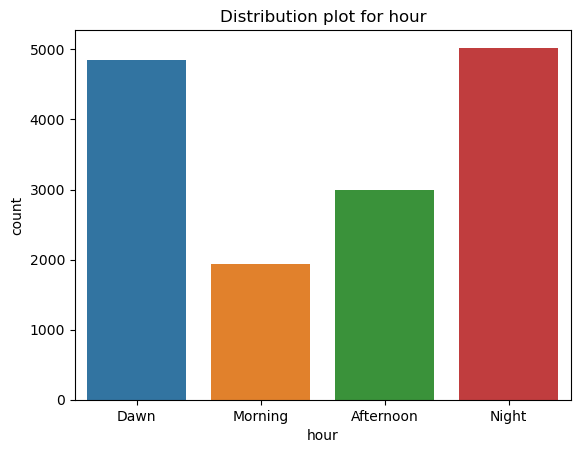

In [41]:

sns.countplot(data = df1, x = 'hour')
plt.title('Distribution plot for hour')

plt.show()

<Axes: xlabel='route_type', ylabel='count'>

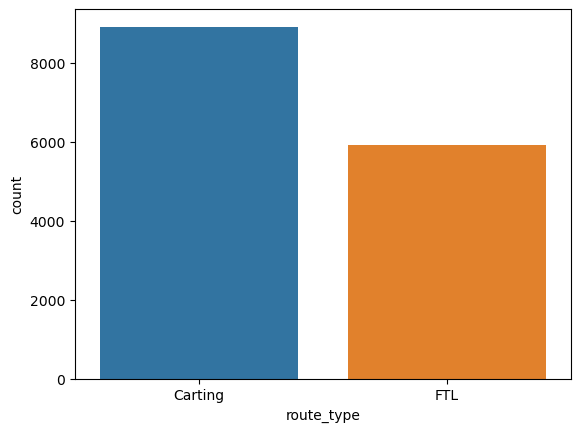

In [42]:
sns.countplot(data = df1,
              x = 'route_type')

1. State with most number of orders are - Maharashtra and Karnataka.

2. Cities with most number of orders are - Bangalore, Mumbai, Gurgaon.

3. Most numbers of trips created in the mid of month (between 12-22).

4. During Night(18-24) and Dawn(0-6), the most number of trips generated.

5. Most of the delivery were done through Carting transportation.

6. Most delivery were originated from Bangalore, Gurgaon.

In [43]:
# number of trips generated from each source city, source state to destination city and destination state
df1.groupby(['source_state','source_city','destination_city','destination_state'])['trip_uuid'].count().to_frame().sort_values(by=['trip_uuid'],ascending=False).reset_index()[:20]

,source_state,source_city,destination_city,destination_state,trip_uuid
0,Karnataka,Bangalore,Bangalore,Karnataka,1376
1,Telangana,Hyderabad,Hyderabad,Telangana,398
2,Maharashtra,Bhiwandi,Mumbai,Maharashtra,332
3,Maharashtra,Mumbai,Mumbai,Maharashtra,264
4,Haryana,Gurgaon,Delhi,Delhi,240
5,Maharashtra,Mumbai Hub,Mumbai,Maharashtra,227
6,Maharashtra,Mumbai,Bhiwandi,Maharashtra,207
7,Tamil Nadu,Chennai,Chennai,Tamil Nadu,201
8,Delhi,Delhi,Gurgaon,Haryana,185
9,Tamil Nadu,MAA,Chennai,Tamil Nadu,178


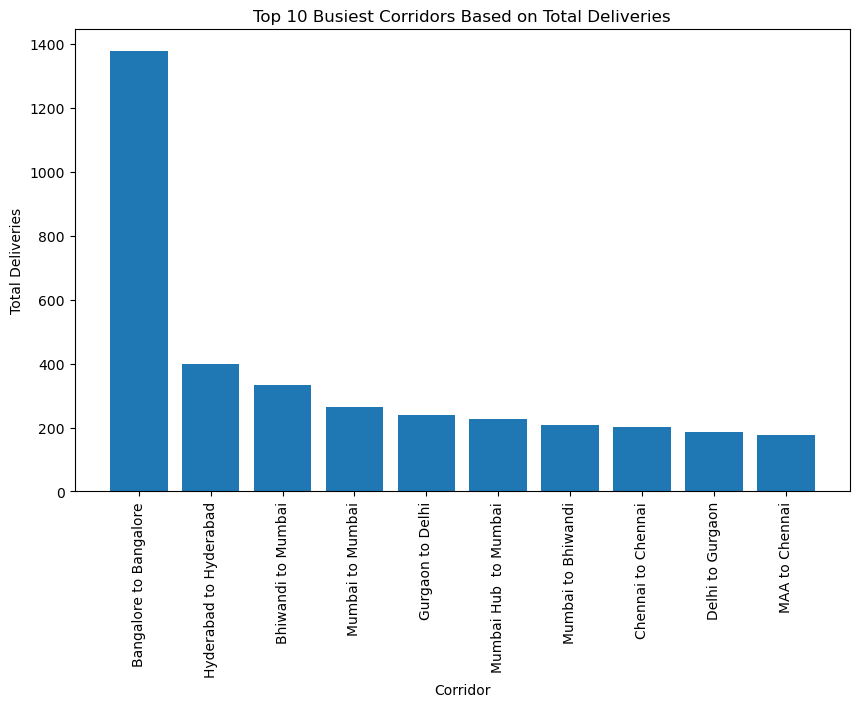

In [44]:
data = df1.groupby(['source_state','source_city','destination_city','destination_state'])['trip_uuid'].count().to_frame().sort_values(by=['trip_uuid'],ascending=False).reset_index()[:10]


# Create a bar chart to visualize the busiest corridors
plt.figure(figsize=(10, 6))
plt.bar(data['source_city'] + ' to ' + data['destination_city'], data['trip_uuid'])
plt.xticks(rotation=90)
plt.xlabel('Corridor')
plt.ylabel('Total Deliveries')
plt.title('Top 10 Busiest Corridors Based on Total Deliveries')

plt.show()

In [45]:
# average time taken to deliver (in mins) between source city and destination city
df1.groupby(['source_state','source_city','destination_city','destination_state'])['actual_time'].agg('mean').to_frame().sort_values(by=['actual_time',],ascending=False).reset_index()[:10]

,source_state,source_city,destination_city,destination_state,actual_time
0,Assam,Guwahati,Bhiwandi,Maharashtra,5457.000000
1,Maharashtra,Bhiwandi,Guwahati,Assam,5067.000000
2,Tamil Nadu,MAA,Gurgaon,Haryana,3606.000000
3,Karnataka,Bangalore,Chandigarh,Punjab,3372.470588
4,Assam,Guwahati,Delhi,Delhi,3370.294118
5,Punjab,Chandigarh,Bangalore,Karnataka,3331.750000
6,Delhi,Delhi,Guwahati,Assam,3306.000000
7,Haryana,Gurgaon,MAA,Tamil Nadu,3117.642857
8,Karnataka,Bangalore,Delhi,Delhi,3039.571429
9,West Bengal,Kolkata,Bangalore,Karnataka,2999.307692


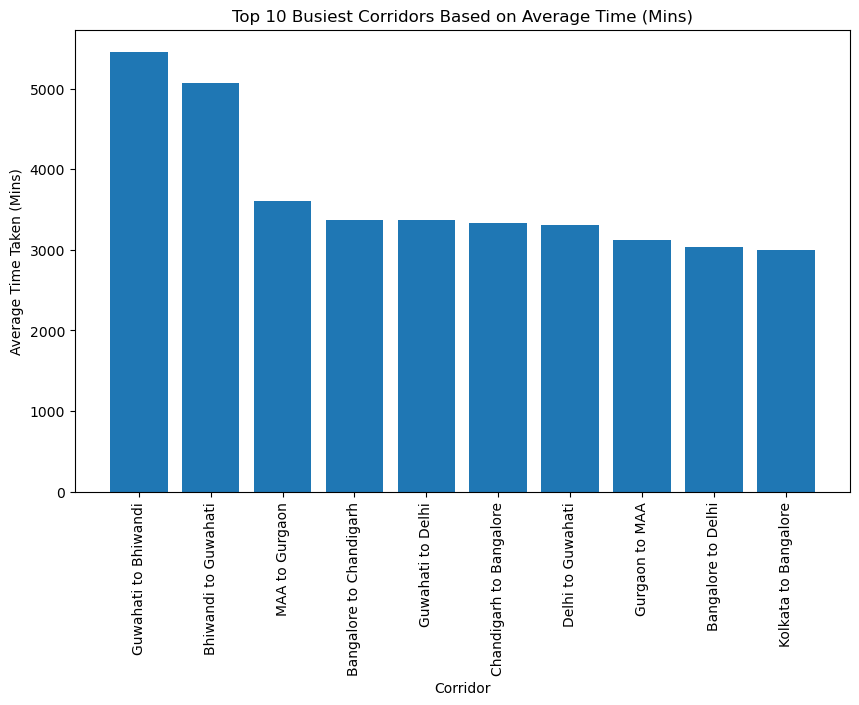

In [46]:
data = df1.groupby(['source_state','source_city','destination_city','destination_state'])['actual_time'].agg('mean').to_frame().sort_values(by=['actual_time',],ascending=False).reset_index()[:10]


# Create a bar chart to visualize the busiest corridors
plt.figure(figsize=(10, 6))
plt.bar(data['source_city'] + ' to ' + data['destination_city'], data['actual_time'])
plt.xticks(rotation=90)
plt.xlabel('Corridor')
plt.ylabel('Average Time Taken (Mins)')
plt.title('Top 10 Busiest Corridors Based on Average Time (Mins)')

plt.show()

In [47]:
# average distance(in kms) between source city and destination city
df1.groupby(['source_state','source_city','destination_city','destination_state'])['actual_distance_to_destination'].agg('mean').to_frame().sort_values(by=['actual_distance_to_destination'],ascending=False).reset_index()

,source_state,source_city,destination_city,destination_state,actual_distance_to_destination
0,Assam,Guwahati,Bhiwandi,Maharashtra,2157.968312
1,Maharashtra,Bhiwandi,Guwahati,Assam,2061.156970
2,Karnataka,Bangalore,Chandigarh,Punjab,1936.674286
3,Punjab,Chandigarh,Bangalore,Karnataka,1927.400257
4,Karnataka,Bangalore,Delhi,Delhi,1765.286113
...,...,...,...,...,...
1657,Madhya Pradesh,Jabalpur,Jabalpur,Madhya Pradesh,9.237405
1658,Telangana,Hyderabad,Hyd,Telangana,9.126716
1659,Delhi,Delhi,North Delhi,Delhi,9.045083
1660,Tamil Nadu,Salem,Salem,Tamil Nadu,9.040986


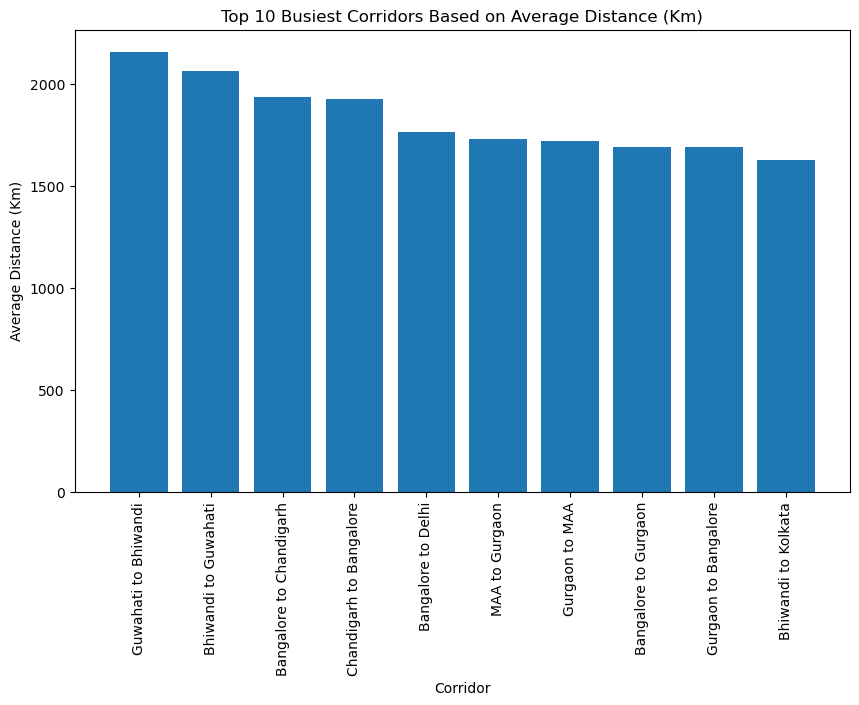

In [48]:
data = df1.groupby(['source_state','source_city','destination_city','destination_state'])['actual_distance_to_destination'].agg('mean').to_frame().sort_values(by=['actual_distance_to_destination'],ascending=False).reset_index()[:10]


# Create a bar chart to visualize the busiest corridors
plt.figure(figsize=(10, 6))
plt.bar(data['source_city'] + ' to ' + data['destination_city'], data['actual_distance_to_destination'])
plt.xticks(rotation=90)
plt.xlabel('Corridor')
plt.ylabel('Average Distance (Km)')
plt.title('Top 10 Busiest Corridors Based on Average Distance (Km)')

plt.show()

Busiest Corridor with respect to total number of deliveries is Bangalore-Bangalore, followed by Hyderabad-Hyderabad.

Busiest corridor with respect to average time taken is Guwahati-Bhiwandi, followed by bhiwandi-Guwahati then MAA-Gurgaon.

Busiest corridor with respect to average distance is Guwahati-Bhiwandi, followed by bhiwandi-Guwahati then Bangalore-Chandigarh.

In [49]:
# numerical columns
num_cols = ['start_scan_to_end_scan', 'od_start_end', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 
            'segment_osrm_time', 'segment_osrm_distance']

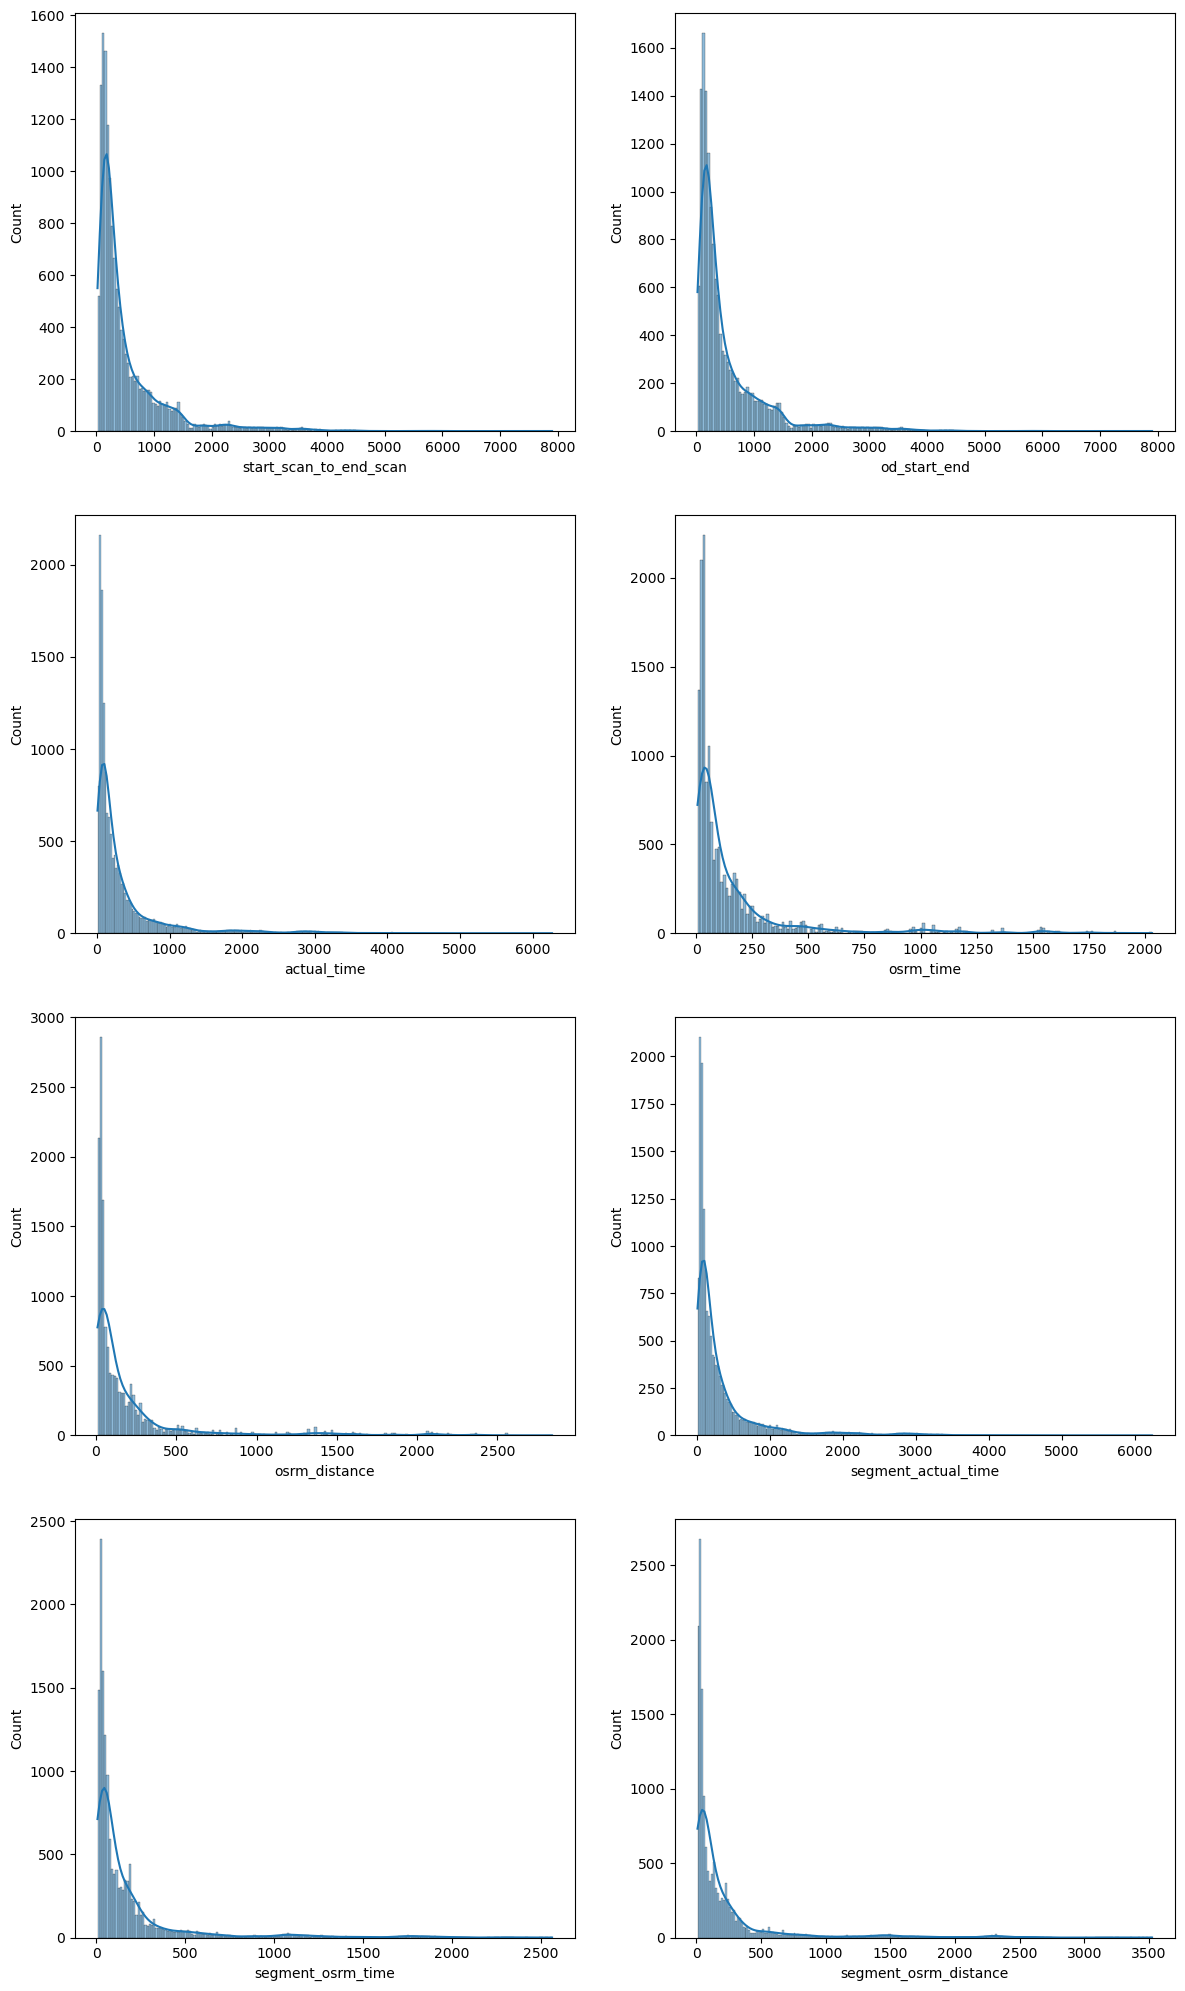

In [50]:
# distribution plot for continuous/ numerical variables
fig = plt.figure(figsize = (8,25))

fig.subplots_adjust(right = 1.5)

for plot in range(1,len(num_cols)+1):
    plt.subplot(4,2,plot)
    sns.histplot(data = df1,
                  x = num_cols[plot-1],
                kde=True)

We can observe that the data is right-skewed. 

We will use log-normal to check if numerical columns follow Normal Distribution.

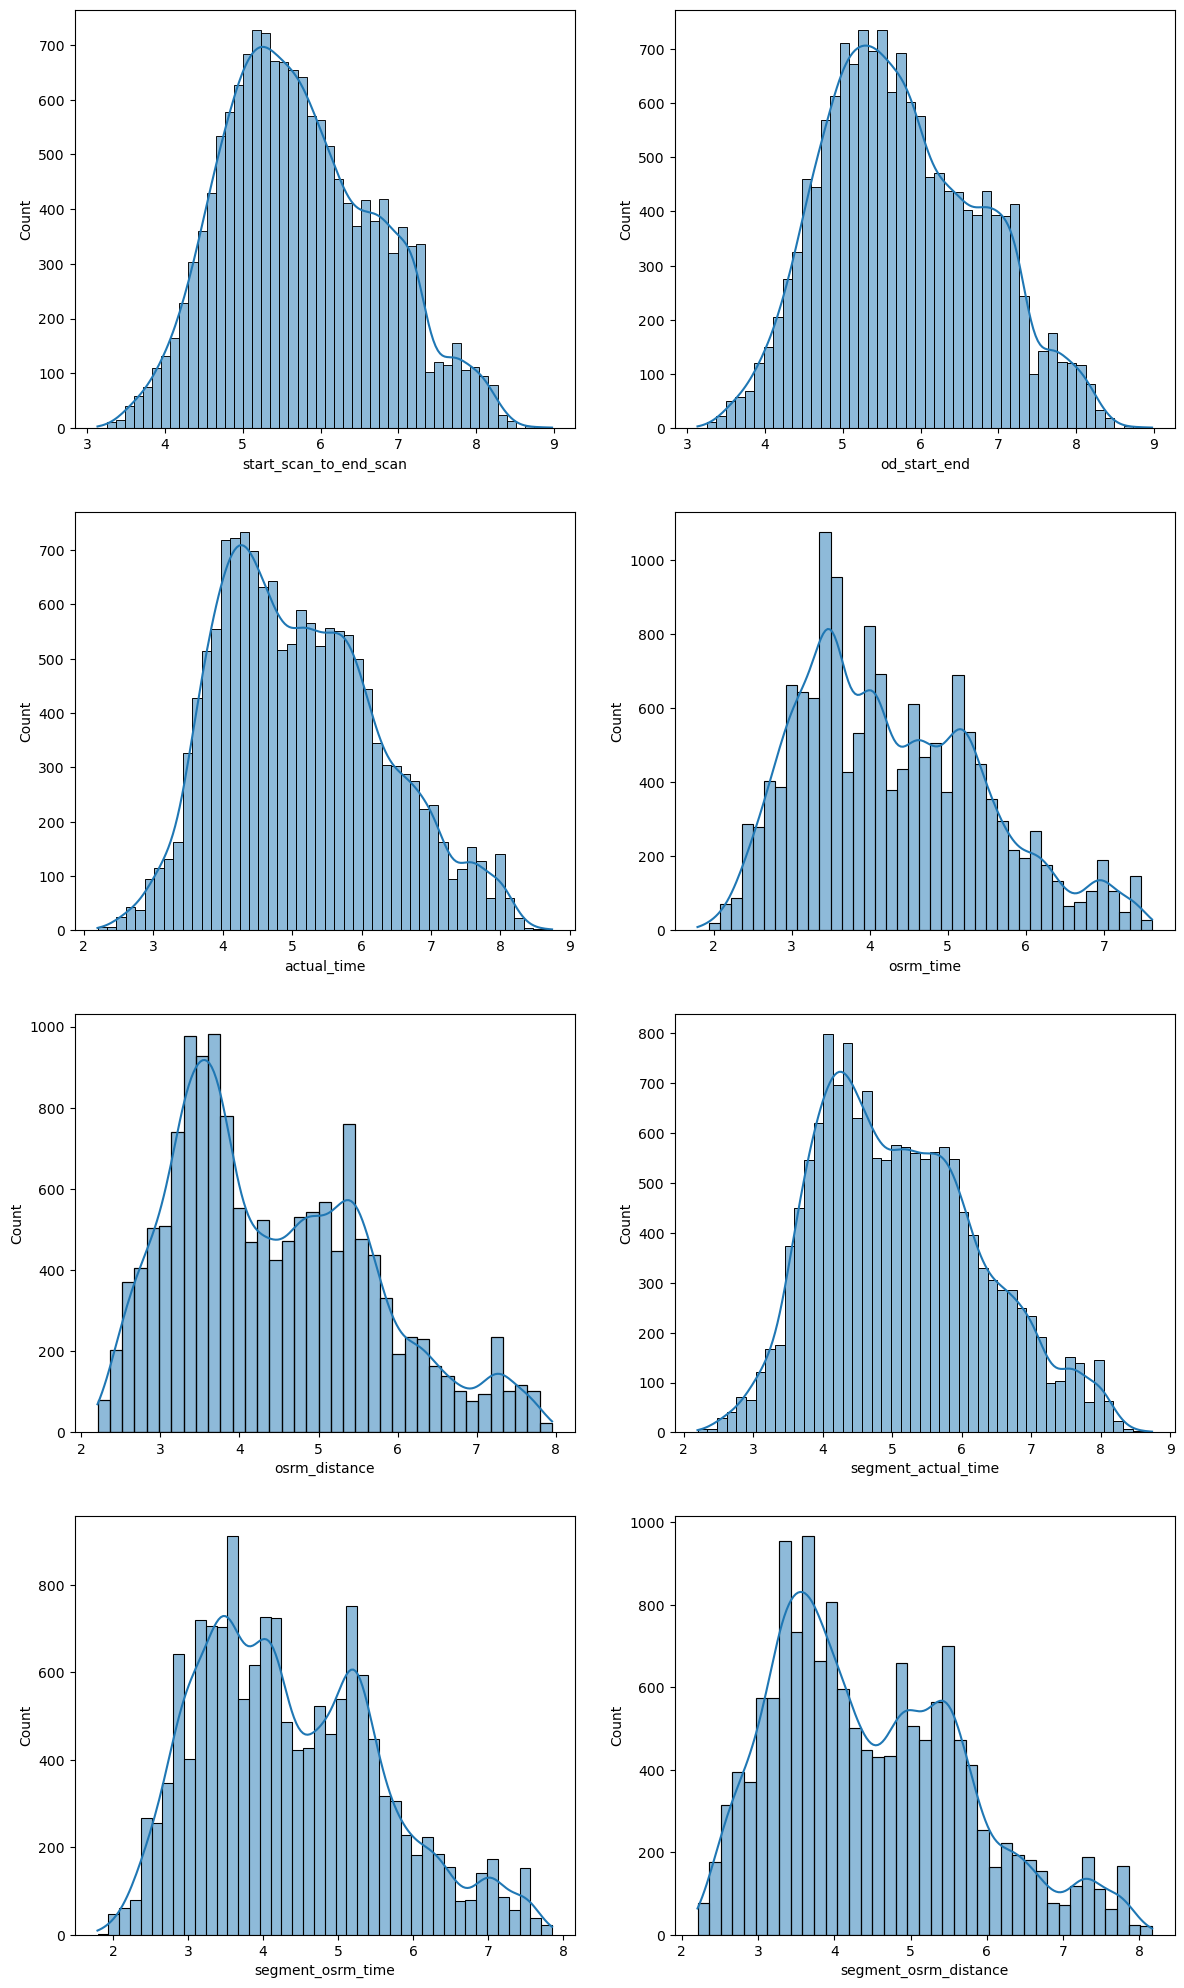

In [51]:
# distribution plot for continuous/ numerical variables using log
fig = plt.figure(figsize = (8,25))

fig.subplots_adjust(right = 1.5)

for plot in range(1,len(num_cols)+1):
    plt.subplot(4,2,plot)
    sns.histplot(np.log(df1[num_cols[plot-1]]),
                kde=True)

We can observe that data looks like Normal Distribution. We will use Shapiro-Test to check if this holds true.

## Bi-variate Analysis

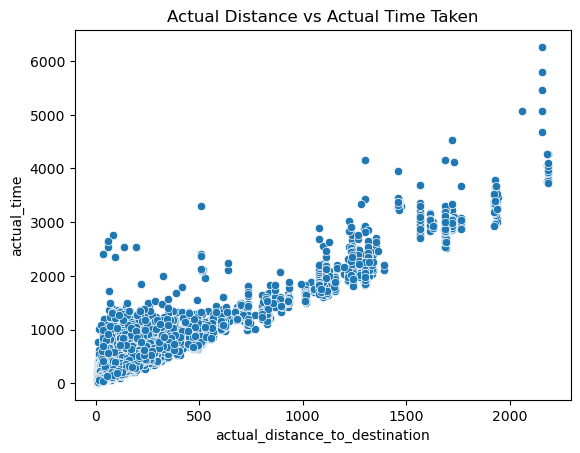

In [52]:
sns.scatterplot(data = df1,x = 'actual_distance_to_destination', y ='actual_time')
plt.title('Actual Distance vs Actual Time Taken')

plt.show()

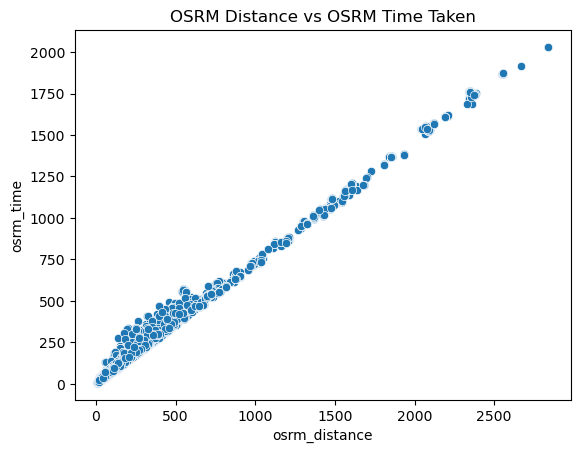

In [53]:
sns.scatterplot(data = df1,x = 'osrm_distance', y ='osrm_time')
plt.title('OSRM Distance vs OSRM Time Taken')

plt.show()

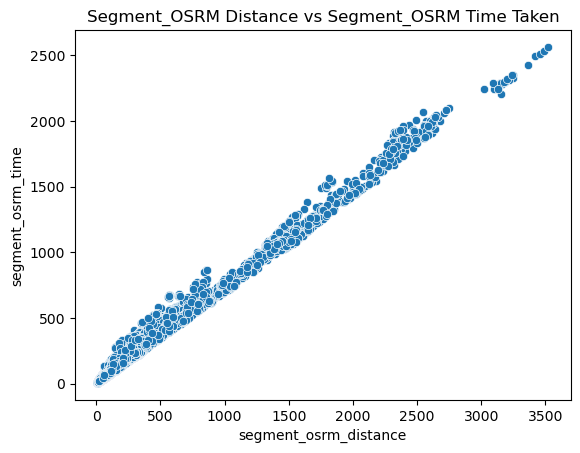

In [54]:
sns.scatterplot(data = df1,x = 'segment_osrm_distance', y ='segment_osrm_time')
plt.title('Segment_OSRM Distance vs Segment_OSRM Time Taken')

plt.show()

We can observe that there is a highly positive correlation between:

1. osrm_distance and osrm_time
2. segment_osrm_distance and segment_osrm_time

This means that whenever the distance of delivery increases, time taken to deliver will also increase.

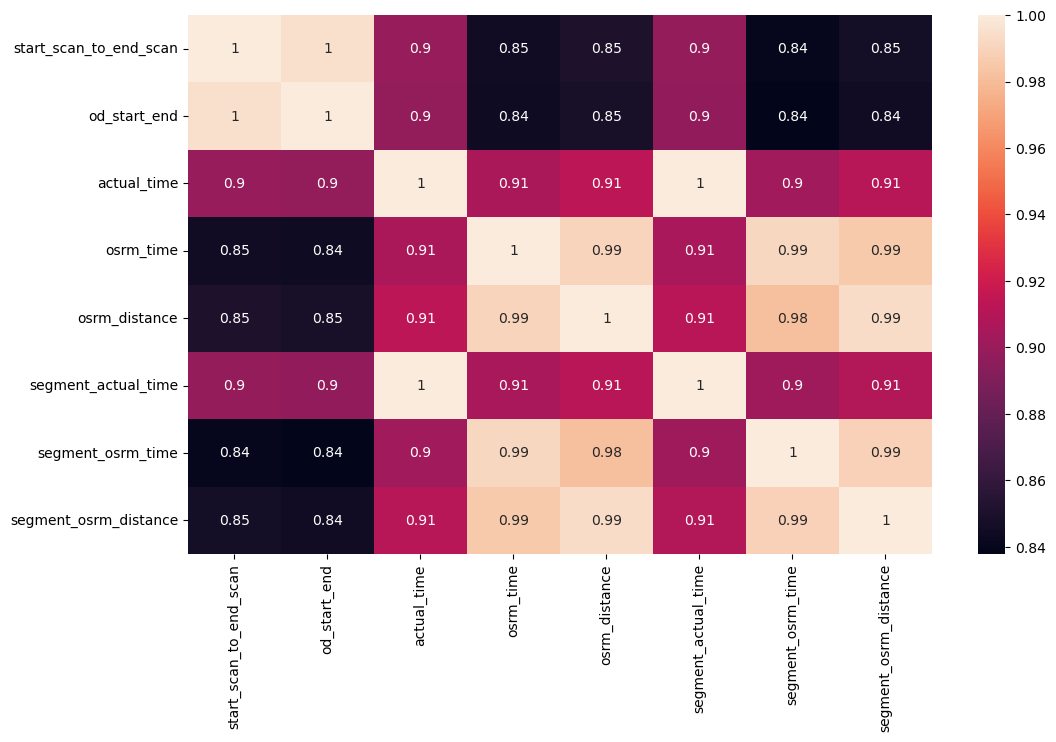

In [55]:
plt.figure(figsize=(12, 7))
sns.heatmap(df1[num_cols].corr(method='spearman'), 
            annot=True)
plt.show()

Values with >=0.9 are highly correlated.

In [56]:
# taking log of numerical columns to do further analysis
log_df1 = df1.copy()
log_df1[num_cols] = np.log(log_df1[num_cols])


## Hypthesis Testing

### od_start_end vs start_scan_to_end_scan

We will use **paired t-test** if data is normally distributed.

To check Normal Distribution, we will use **Shapiro-Wilk Test**

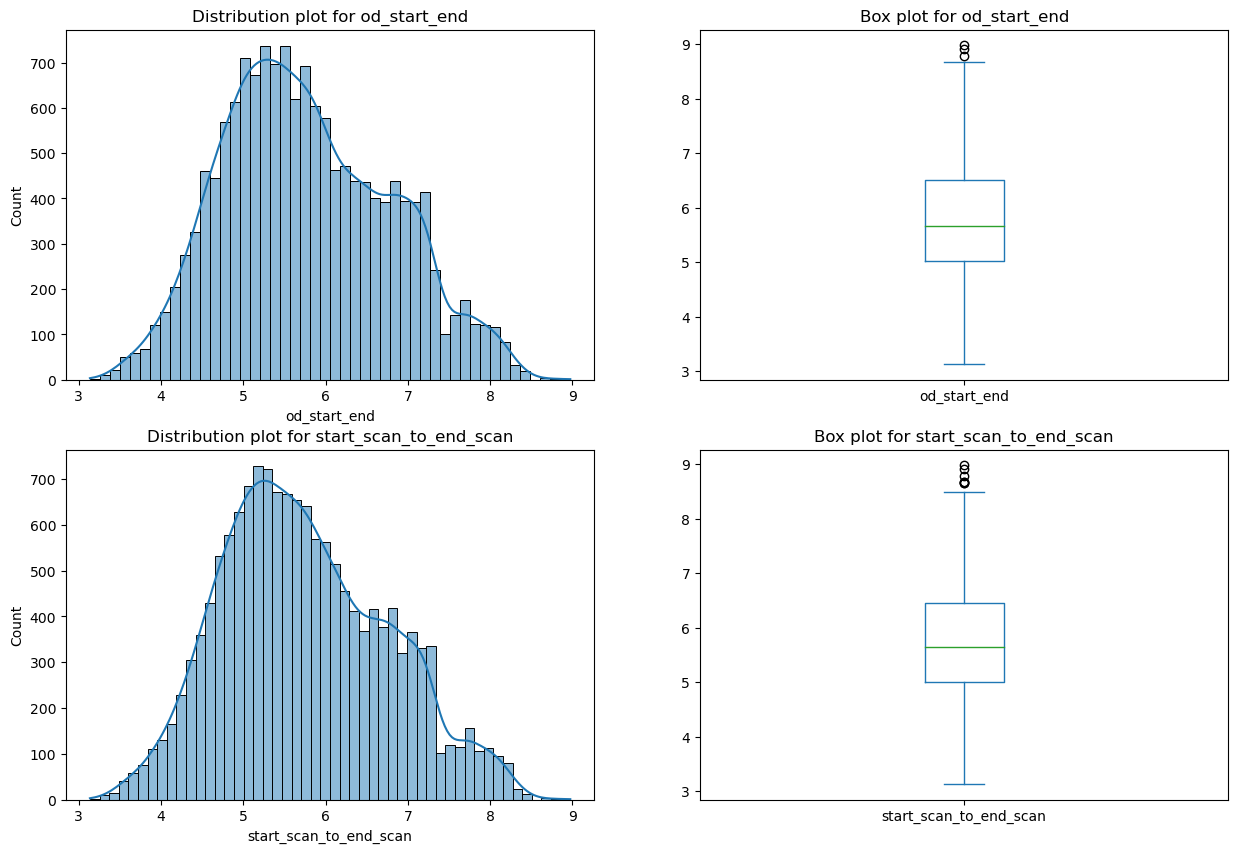

In [57]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(log_df1['od_start_end'],kde=True)
plt.title('Distribution plot for od_start_end')

plt.subplot(2,2,2)
log_df1['od_start_end'].plot.box()
plt.title('Box plot for od_start_end')

plt.subplot(2,2,3)
sns.histplot(log_df1['start_scan_to_end_scan'],kde=True)
plt.title('Distribution plot for start_scan_to_end_scan')

plt.subplot(2,2,4)
log_df1['start_scan_to_end_scan'].plot.box()
plt.title('Box plot for start_scan_to_end_scan')

plt.show()

In [58]:
# importing qqplot for visual analysis
from statsmodels.graphics.gofplots import qqplot

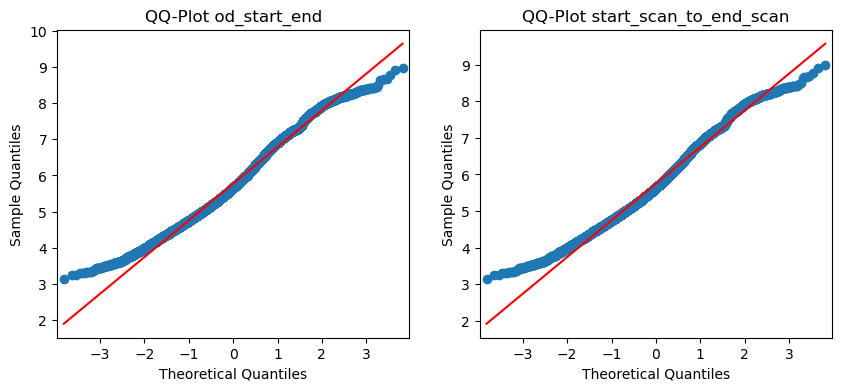

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

qqplot(log_df1['od_start_end'], line='s', ax=ax1)
qqplot(log_df1['start_scan_to_end_scan'], line='s', ax=ax2)
ax1.set_title('QQ-Plot od_start_end')
ax2.set_title('QQ-Plot start_scan_to_end_scan')

plt.show()

By doing visual anaylsis (**QQ-Plot**), we can see that log data for od_start_end and start_scan_to_end_scan is close to line so we are not sure if it follows normal distribution. Now to confirm this, we will use **Shapiro-Wilks Test**.

In [60]:
from scipy.stats import shapiro  # for checking normality

#### Checking start_scan_to_end_scan is normally distributed.

Null Hypothesis, H0 : start_scan_to_end_scan follows normal distribution.

Alternate Hypothesis, Ha : start_scan_to_end_scan doesn't follow normal distribution.

In [61]:
alpha = 0.05  # significance level

test_statistics, p_value = shapiro(log_df1['start_scan_to_end_scan'].sample(4999))
print('p_value is %.2f'%p_value)

if p_value < alpha:
    print('As p_value is less than alpha, we reject the null hypothesis,i.e., start_scan_to_end_scan does not follow normal distribution.')
else:
    print('As p_value is greater than alpha, we fail to reject the null hypothesis,i.e., start_scan_to_end_scan follows normal distribution.')

p_value is 0.00
As p_value is less than alpha, we reject the null hypothesis,i.e., start_scan_to_end_scan does not follow normal distribution.


#### Checking od_start_end is normally distributed.

Null Hypothesis, H0 : od_start_end follows normal distribution.

Alternate Hypothesis, Ha : od_start_end doesn't follow normal distribution.

In [62]:
alpha = 0.05  # significance level

test_statistics, p_value = shapiro(log_df1['od_start_end'].sample(4999))
print('p_value is %.2f'%p_value)

if p_value < alpha:
    print('As p_value is less than alpha, we reject the null hypothesis,i.e., od_start_end does not follow normal distribution.')
else:
    print('As p_value is greater than alpha, we fail to reject the null hypothesis,i.e., od_start_end follows normal distribution.')

p_value is 0.00
As p_value is less than alpha, we reject the null hypothesis,i.e., od_start_end does not follow normal distribution.


**Observation**

log_df1 for od_start_end and start_scan_to_end_scan does not follow Normal Distribution. But as per histogram, the plot some-what looks like following normal distribution.

In [63]:
log_df1['od_start_end'].mean()  # od_start_end mean

5.771618674881915

In [64]:
log_df1['start_scan_to_end_scan'].mean()  # start_scan_to_end_scan mean

5.746328700101915

#### Both start_scan_to_end_scan and od_start_end does not follow Normal Distribution. We are using paired t-test here to find the relation between means of two groups and to find if there is any relation.

H0 : The mean difference of start_scan_to_end_scan and od_start_end is equal to 0. (mu1 - mu2 =0)

HA : The mean difference is not equal to zero.(mu1 - mu2 != 0)

In [65]:
from scipy.stats import ttest_rel  # paired t-test

In [66]:
alpha = 0.05  # significance level

p_value = ttest_rel(log_df1['start_scan_to_end_scan'],log_df1['od_start_end'])[1]
print('p_value is %.2f'%p_value)

if p_value < alpha:
    print('As p_value is less than alpha, we reject the null hypothesis,i.e., the mean difference is not zero.')
else:
    print('As p_value is greater than alpha, we fail to reject the null hypothesis,i.e., the mean difference is zero.')

p_value is 0.00
As p_value is less than alpha, we reject the null hypothesis,i.e., the mean difference is not zero.


**Observation**

It is statistically significant that there is a dfference in od_start_end and start_scan_to_end_scan and they are not similiar.

## actual_time vs osrm_time

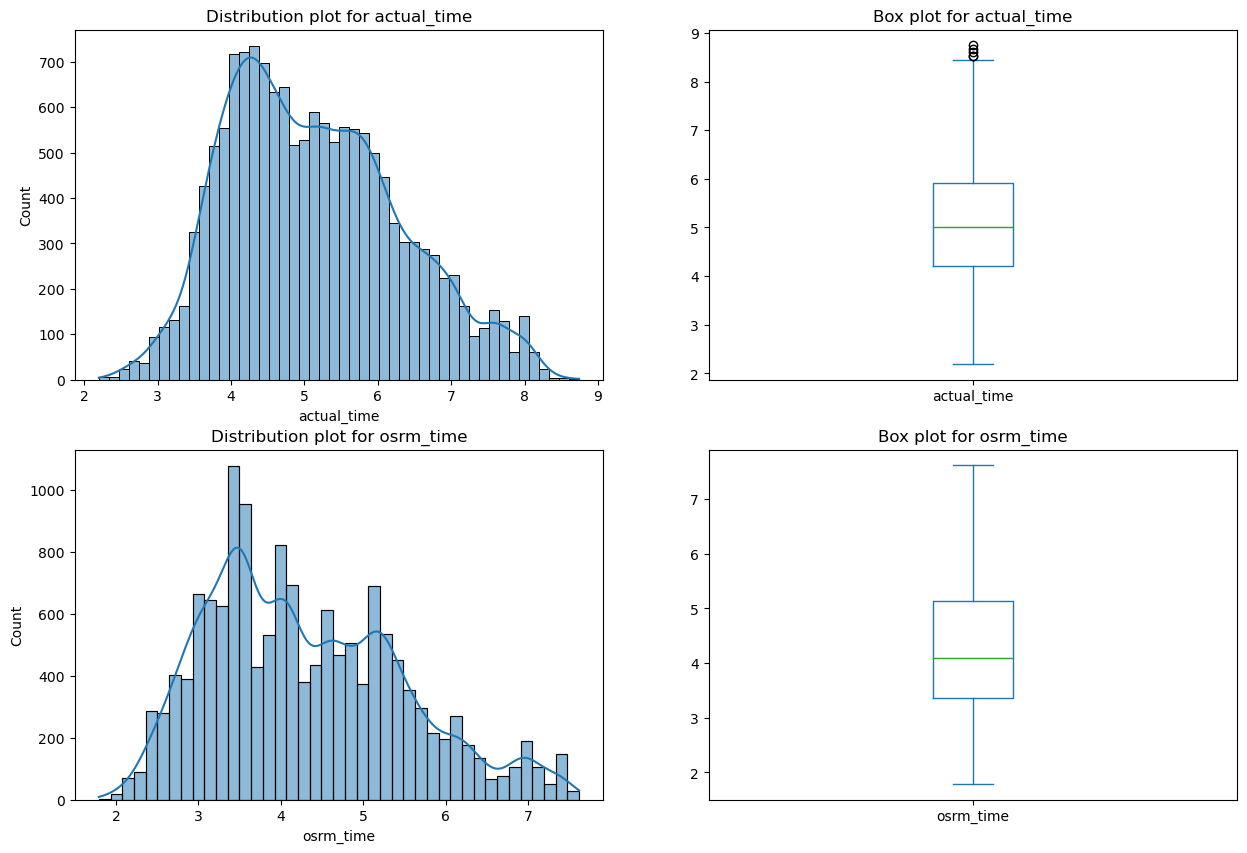

In [67]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(log_df1['actual_time'],kde=True)
plt.title('Distribution plot for actual_time')

plt.subplot(2,2,2)
log_df1['actual_time'].plot.box()
plt.title('Box plot for actual_time')

plt.subplot(2,2,3)
sns.histplot(log_df1['osrm_time'],kde=True)
plt.title('Distribution plot for osrm_time')

plt.subplot(2,2,4)
log_df1['osrm_time'].plot.box()
plt.title('Box plot for osrm_time')

plt.show()

We will use **paired t-test** if data is normally distributed.

To check Normal Distribution, we will use **Shapiro-Wilk Test**

In [68]:
# importing qqplot for visual analysis
from statsmodels.graphics.gofplots import qqplot

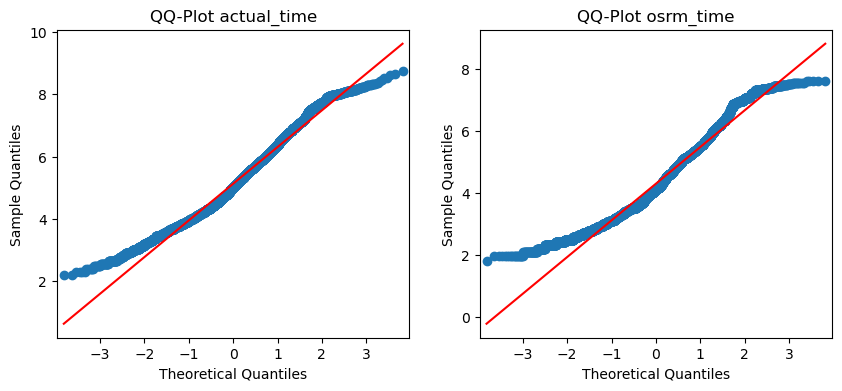

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

qqplot(log_df1['actual_time'], line='s', ax=ax1)
qqplot(log_df1['osrm_time'], line='s', ax=ax2)
ax1.set_title('QQ-Plot actual_time')
ax2.set_title('QQ-Plot osrm_time')

plt.show()

By doing visual anaylsis (**QQ-Plot**), we can see that log data for actual_time and osrm_time is close to line so we are not sure if it follows normal distribution. Now to confirm this, we will use **Shapiro-Wilks Test**.

Null Hypothesis, H0 : actual_time follows normal distribution.

Alternate Hypothesis, Ha : actual_time doesn't follow normal distribution.

In [70]:
alpha = 0.05  # significance level

test_statistics, p_value = shapiro(log_df1['actual_time'].sample(4999))
print('p_value is %.2f'%p_value)

if p_value < alpha:
    print('As p_value is less than alpha, we reject the null hypothesis, i.e., actual_time does not follow normal distribution.')
else:
    print('As p_value is greater than alpha, we fail to reject the null hypothesis, i.e., actual_time follows normal distribution.')

p_value is 0.00
As p_value is less than alpha, we reject the null hypothesis, i.e., actual_time does not follow normal distribution.


Null Hypothesis, H0 : osrm_time follows normal distribution.

Alternate Hypothesis, Ha : osrm_time doesn't follow normal distribution.

In [71]:
alpha = 0.05  # significance level

test_statistics, p_value = shapiro(log_df1['osrm_time'].sample(4999))
print('p_value is %.2f'%p_value)

if p_value < alpha:
    print('As p_value is less than alpha, we reject the null hypothesis,i.e., osrm_time does not follow normal distribution.')
else:
    print('As p_value is greater than alpha, we fail to reject the null hypothesis,i.e., osrm_time follows normal distribution.')

p_value is 0.00
As p_value is less than alpha, we reject the null hypothesis,i.e., osrm_time does not follow normal distribution.


**Observation**

log_df1 for actial_time and osrm_time does not follow Normal Distribution. So, we will use Kruskal-Wallis Test to see if there is significant difference between means.

In [72]:
log_df1['actual_time'].mean()  # acutal_time mean

5.128300547566538

In [73]:
log_df1['osrm_time'].mean()  # osrm_time mean

4.29582497767712

#### Both actual_time and osrm_time does not follow Normal Distribution. We are using paired t-test here to find the relation between means of two groups and to find if there is any relation.

H0 : The mean difference of actual_time and osrm_time is equal to 0. (mu1 - mu2 =0)

HA : The mean difference is not equal to zero.(mu1 - mu2 != 0)

In [74]:
alpha = 0.05  # significance level

p_value = ttest_rel(log_df1['osrm_time'],log_df1['actual_time'])[1]
print('p_value is %.2f'%p_value)

if p_value < alpha:
    print('As p_value is less than alpha, we reject the null hypothesis,i.e., the mean difference is not zero.')
else:
    print('As p_value is greater than alpha, we fail to reject the null hypothesis,i.e., the mean difference is zero.')

p_value is 0.00
As p_value is less than alpha, we reject the null hypothesis,i.e., the mean difference is not zero.


**Observation**

It is statistically significant that there is a dfference in osrm_time and actual_time and they are not similiar.

## actual_time vs segment_actual_time

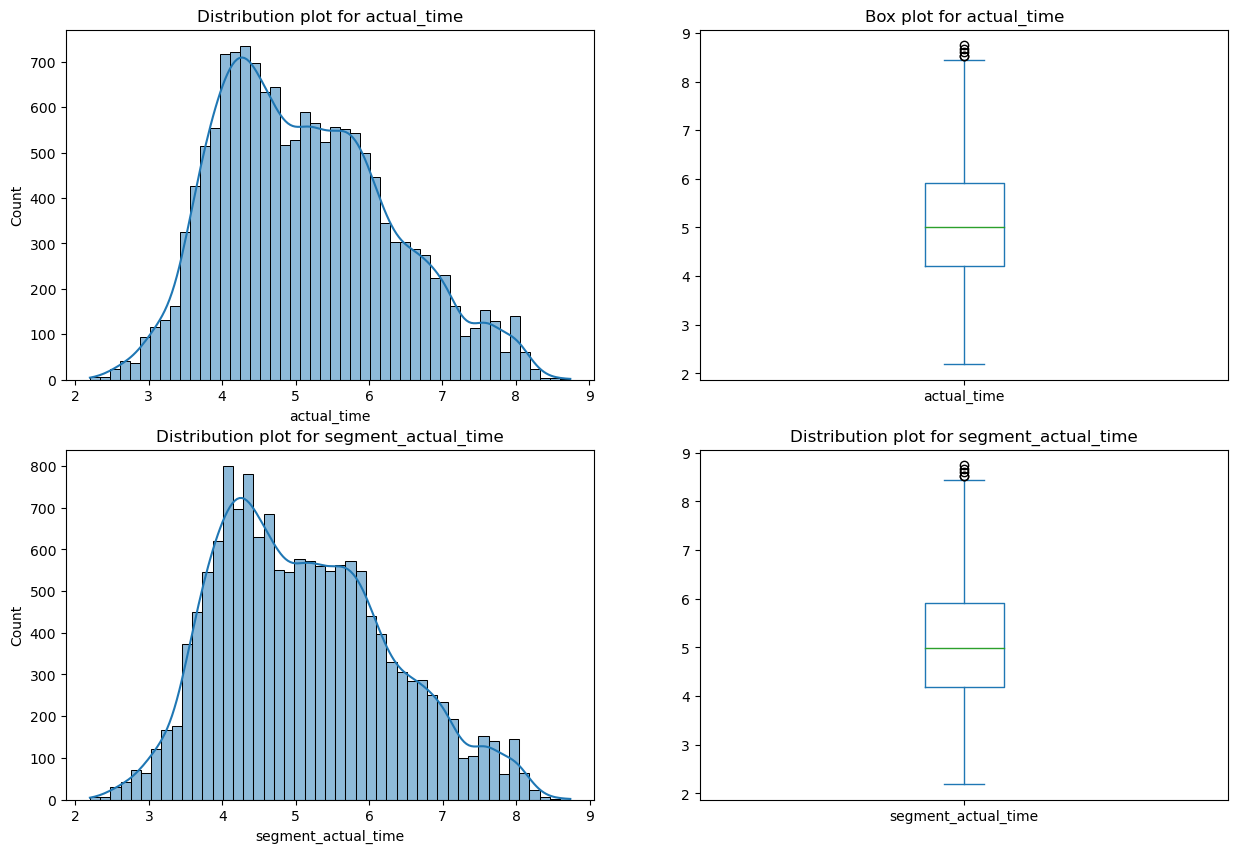

In [75]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(log_df1['actual_time'],kde=True)
plt.title('Distribution plot for actual_time')

plt.subplot(2,2,2)
log_df1['actual_time'].plot.box()
plt.title('Box plot for actual_time')

plt.subplot(2,2,3)
sns.histplot(log_df1['segment_actual_time'],kde=True)
plt.title('Distribution plot for segment_actual_time')

plt.subplot(2,2,4)
log_df1['segment_actual_time'].plot.box()
plt.title('Distribution plot for segment_actual_time')

plt.show()

The distribution and box plot looks similiar for both groups.

Here we will use **paired t-test** if data is normally distributed else we will use **Kruskal-Wallis Test**.

To check Normal Distribution, we will use **Shapiro-Wilk Test**

In [76]:
# importing qqplot for visual analysis
from statsmodels.graphics.gofplots import qqplot

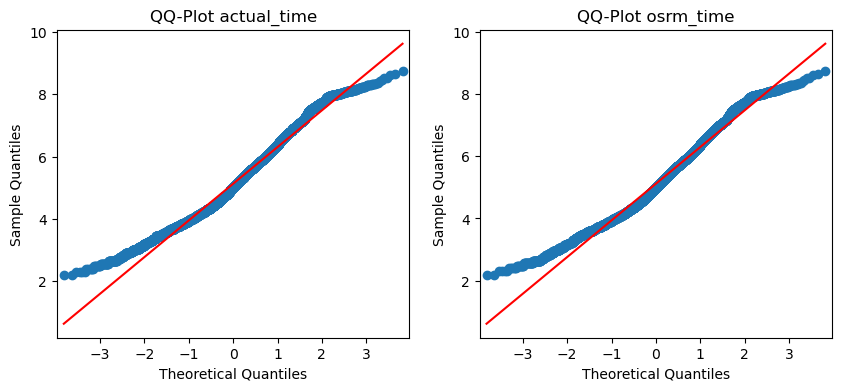

In [77]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

qqplot(log_df1['actual_time'], line='s', ax=ax1)
qqplot(log_df1['segment_actual_time'], line='s', ax=ax2)
ax1.set_title('QQ-Plot actual_time')
ax2.set_title('QQ-Plot osrm_time')

plt.show()

By doing visual anaylsis (**QQ-Plot**), we can see that log data for actual_time and segment_actual_time is close to line so we are not sure if it follows normal distribution. Now to confirm this, we will use **Shapiro-Wilks Test**.

Null Hypothesis, H0 : segment_actual_time follows normal distribution.

Alternate Hypothesis, Ha : segment_actual_time doesn't follow normal distribution.

In [78]:
alpha = 0.05  # significance level

test_statistics, p_value = shapiro(log_df1['segment_actual_time'].sample(4999))
print('p_value is %.2f'%p_value)

if p_value < alpha:
    print('As p_value is less than alpha, we reject the null hypothesis,i.e., segment_actual_time does not follow normal distribution.')
else:
    print('As p_value is greater than alpha, we fail to reject the null hypothesis,i.e., segment_actual_time follows normal distribution.')

p_value is 0.00
As p_value is less than alpha, we reject the null hypothesis,i.e., segment_actual_time does not follow normal distribution.


**Observation**

log_df1 for actial_time and segment_actual_time does not follow Normal Distribution. So, we will use Kruskal-Wallis Test to see if there is significant difference between means.

In [79]:
log_df1['actual_time'].mean()  # acutal_time mean

5.128300547566538

In [80]:
log_df1['segment_actual_time'].mean()  # osrm_time mean

5.117768489680647

#### Both actual_time and segment_actual_time does not follow Normal Distribution. We are using paired t-test here to find the relation between means of two groups and to find if there is any relation.

H0 : The mean difference of actual_time and segment_actual_time is equal to 0. (mu1 - mu2 =0)

HA : The mean difference is not equal to zero.(mu1 - mu2 != 0)

In [81]:
alpha = 0.05  # significance level

p_value = ttest_rel(log_df1['segment_actual_time'],log_df1['actual_time'])[1]
print('p_value is %.2f'%p_value)

if p_value < alpha:
    print('As p_value is less than alpha, we reject the null hypothesis,i.e., the mean difference is not zero.')
else:
    print('As p_value is greater than alpha, we fail to reject the null hypothesis,i.e., the mean difference is zero.')

p_value is 0.00
As p_value is less than alpha, we reject the null hypothesis,i.e., the mean difference is not zero.


**Observation**

It is statistically significant that there is a dfference in segment_actual_time and actual_time and they are not similiar.

## osrm_distance vs segment_osrm_distance

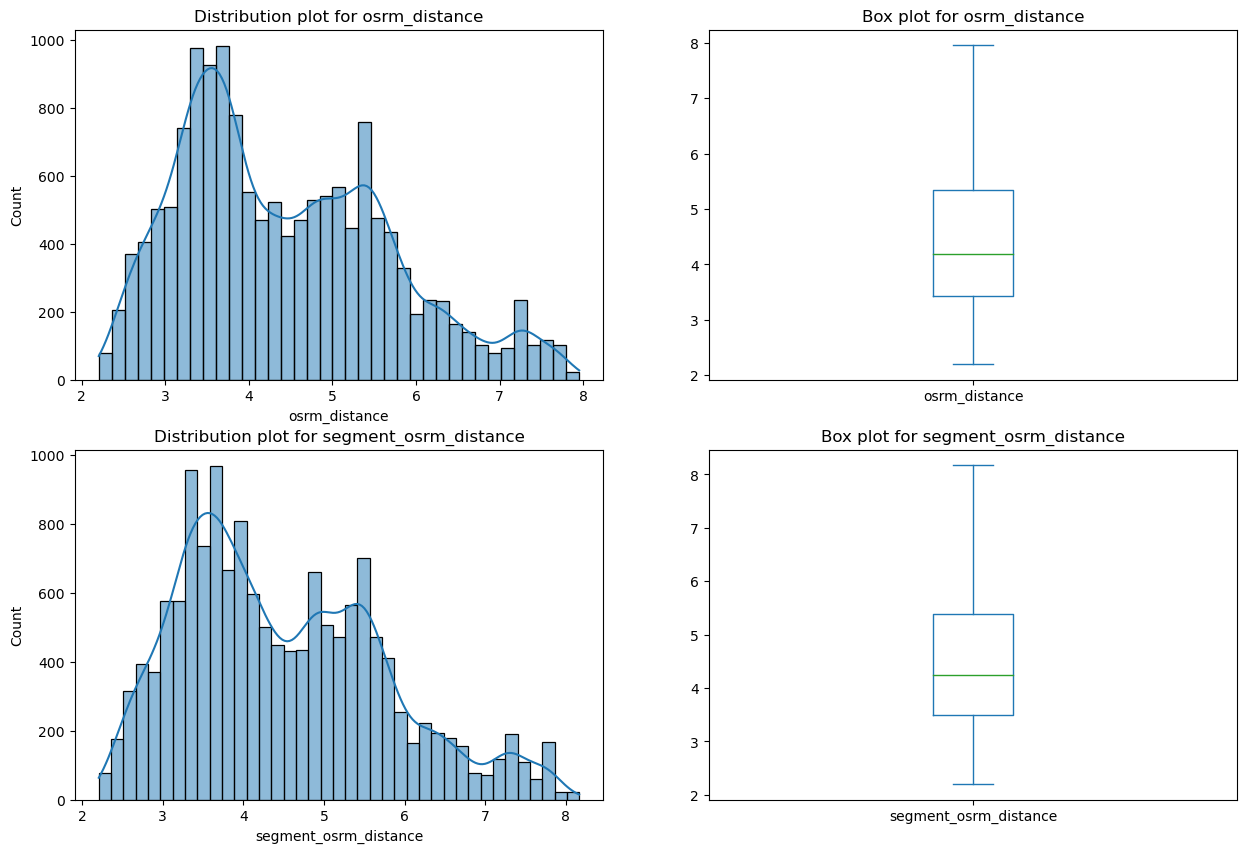

In [82]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(log_df1['osrm_distance'],kde=True)
plt.title('Distribution plot for osrm_distance')

plt.subplot(2,2,2)
log_df1['osrm_distance'].plot.box()
plt.title('Box plot for osrm_distance')

plt.subplot(2,2,3)
sns.histplot(log_df1['segment_osrm_distance'],kde=True)
plt.title('Distribution plot for segment_osrm_distance')

plt.subplot(2,2,4)
log_df1['segment_osrm_distance'].plot.box()
plt.title('Box plot for segment_osrm_distance')

plt.show()

The distribution and the box plot for both is almost similiar.

We will use **paired t-test** if data is normally distributed.

To check Normal Distribution, we will use **Shapiro-Wilk Test**

In [83]:
# importing qqplot for visual analysis
from statsmodels.graphics.gofplots import qqplot

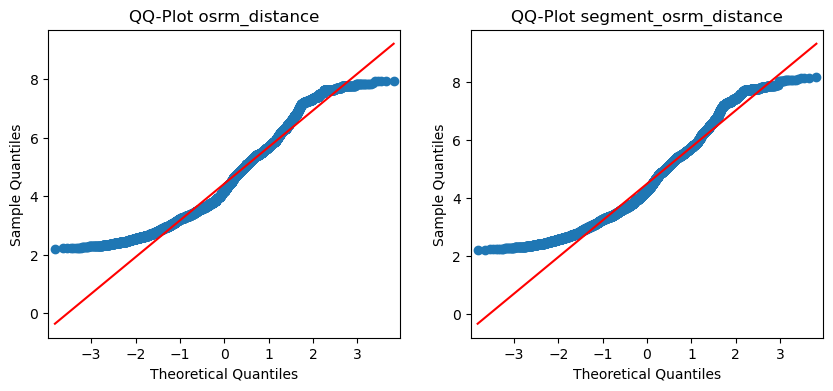

In [84]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

qqplot(log_df1['osrm_distance'], line='s', ax=ax1)
qqplot(log_df1['segment_osrm_distance'], line='s', ax=ax2)
ax1.set_title('QQ-Plot osrm_distance')
ax2.set_title('QQ-Plot segment_osrm_distance')

plt.show()

By doing visual anaylsis (**QQ-Plot**), we can see that log data for osrm_distance and segment_osrm_distance is close to line so we are not sure if it follows normal distribution. Now to confirm this, we will use **Shapiro-Wilks Test**.

Null Hypothesis, H0 : osrm_distance follows normal distribution.

Alternate Hypothesis, Ha : osrm_distance doesn't follow normal distribution.

In [85]:
alpha = 0.05  # significance level

test_statistics, p_value = shapiro(log_df1['osrm_distance'].sample(4999))
print('p_value is %.2f'%p_value)

if p_value < alpha:
    print('As p_value is less than alpha, we reject the null hypothesis,i.e., osrm_distance does not follow normal distribution.')
else:
    print('As p_value is greater than alpha, we fail to reject the null hypothesis,i.e., osrm_distance follows normal distribution.')

p_value is 0.00
As p_value is less than alpha, we reject the null hypothesis,i.e., osrm_distance does not follow normal distribution.


Null Hypothesis, H0 : segment_osrm_distance follows normal distribution.

Alternate Hypothesis, Ha : segment_osrm_distance doesn't follow normal distribution.

In [86]:
alpha = 0.05  # significance level

test_statistics, p_value = shapiro(log_df1['segment_osrm_distance'].sample(4999))
print('p_value is %.2f'%p_value)

if p_value < alpha:
    print('As p_value is less than alpha, we reject the null hypothesis,i.e., segment_osrm_distance does not follow normal distribution.')
else:
    print('As p_value is greater than alpha, we fail to reject the null hypothesis,i.e., segment_osrm_distance follows normal distribution.')

p_value is 0.00
As p_value is less than alpha, we reject the null hypothesis,i.e., segment_osrm_distance does not follow normal distribution.


**Observation**

log_df1 for segment_osrm_distance and osrm_distance does not follow Normal Distribution. So, we will use Kruskal-Wallis Test to see if there is significant difference between means.

In [87]:
log_df1['segment_osrm_distance'].mean()  # acutal_time mean

4.488997242044907

In [88]:
log_df1['osrm_distance'].mean()  # osrm_time mean

4.42785363016848

#### Both segment_osrm_distance and osrm_distance does not follow Normal Distribution. We are using paired t-test here to find the relation between means of two groups and to find if there is any relation.

H0 : The mean difference of segment_osrm_distance and osrm_distance is equal to 0. (mu1 - mu2 =0)

HA : The mean difference is not equal to zero.(mu1 - mu2 != 0)

In [89]:
alpha = 0.05  # significance level

p_value = ttest_rel(log_df1['segment_osrm_distance'],log_df1['osrm_distance'])[1]
print('p_value is %.2f'%p_value)

if p_value < alpha:
    print('As p_value is less than alpha, we reject the null hypothesis,i.e., the mean difference is not zero.')
else:
    print('As p_value is greater than alpha, we fail to reject the null hypothesis,i.e., the mean difference is zero.')

p_value is 0.00
As p_value is less than alpha, we reject the null hypothesis,i.e., the mean difference is not zero.


**Observation**

It is statistically significant that there is a dfference in segment_osrm_distance and osrm_distance and they are not similiar.

## osrm_time vs segment_osrm_time

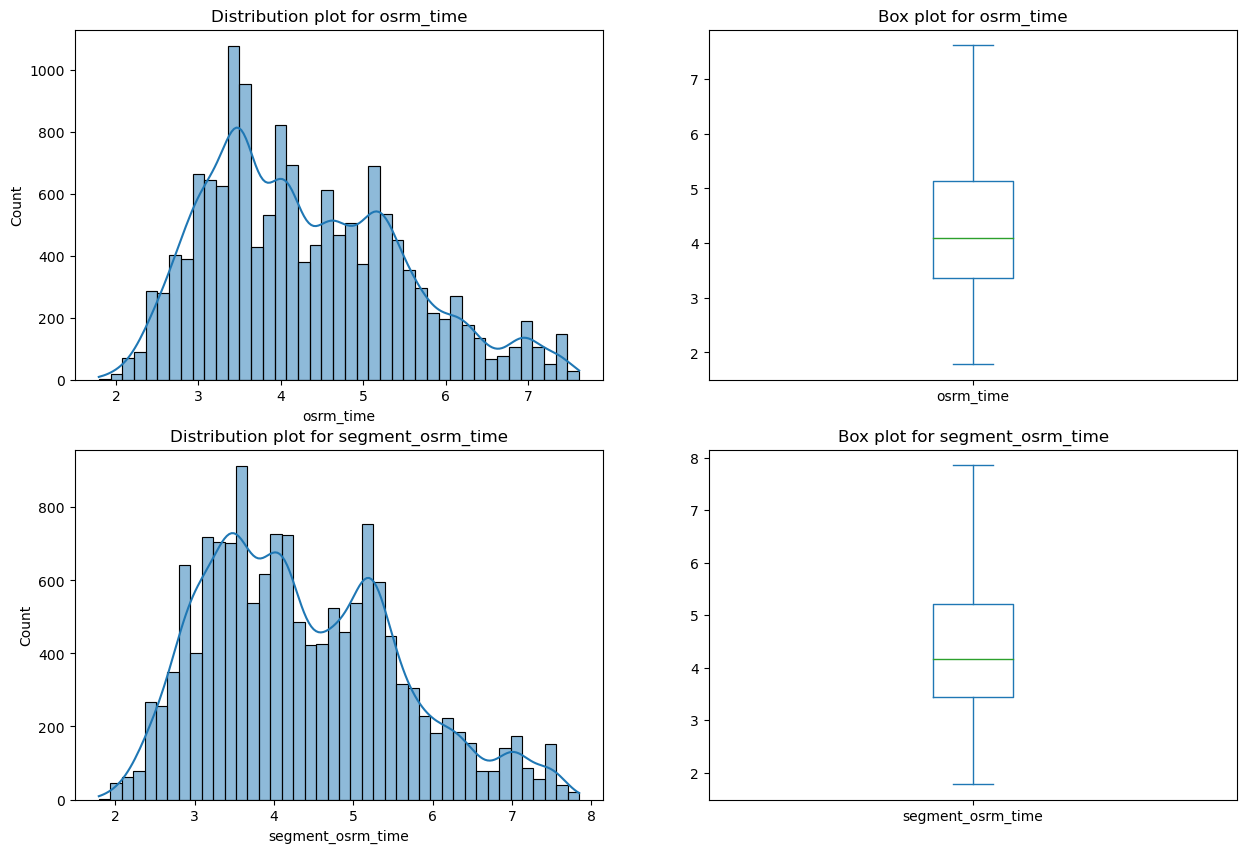

In [90]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(log_df1['osrm_time'],kde=True)
plt.title('Distribution plot for osrm_time')

plt.subplot(2,2,2)
log_df1['osrm_time'].plot.box()
plt.title('Box plot for osrm_time')

plt.subplot(2,2,3)
sns.histplot(log_df1['segment_osrm_time'],kde=True)
plt.title('Distribution plot for segment_osrm_time')

plt.subplot(2,2,4)
log_df1['segment_osrm_time'].plot.box()
plt.title('Box plot for segment_osrm_time')

plt.show()

Both does not follow Normal Distribution (as saw above).

#### Both osrm_time and segment_osrm_time does not follow Normal Distribution. We are using paired t-test here to find the relation between means of two groups and to find if there is any relation.

H0 : The mean difference of osrm_time and segment_osrm_time is equal to 0. (mu1 - mu2 =0)

HA : The mean difference is not equal to zero.(mu1 - mu2 != 0)

In [91]:
alpha = 0.05  # significance level

p_value = ttest_rel(log_df1['osrm_time'],log_df1['segment_osrm_time'])[1]
print('p_value is %.2f'%p_value)

if p_value < alpha:
    print('As p_value is less than alpha, we reject the null hypothesis,i.e., the mean difference is not zero.')
else:
    print('As p_value is greater than alpha, we fail to reject the null hypothesis,i.e., the mean difference is zero.')

p_value is 0.00
As p_value is less than alpha, we reject the null hypothesis,i.e., the mean difference is not zero.


**Observation**

It is statistically significant that there is a dfference in osrm_time and segment_osrm_time and they are not similiar.

## Outlier Detection

In [92]:
# numerical columns
num_cols = ['start_scan_to_end_scan', 'od_start_end', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 
            'segment_osrm_time', 'segment_osrm_distance']

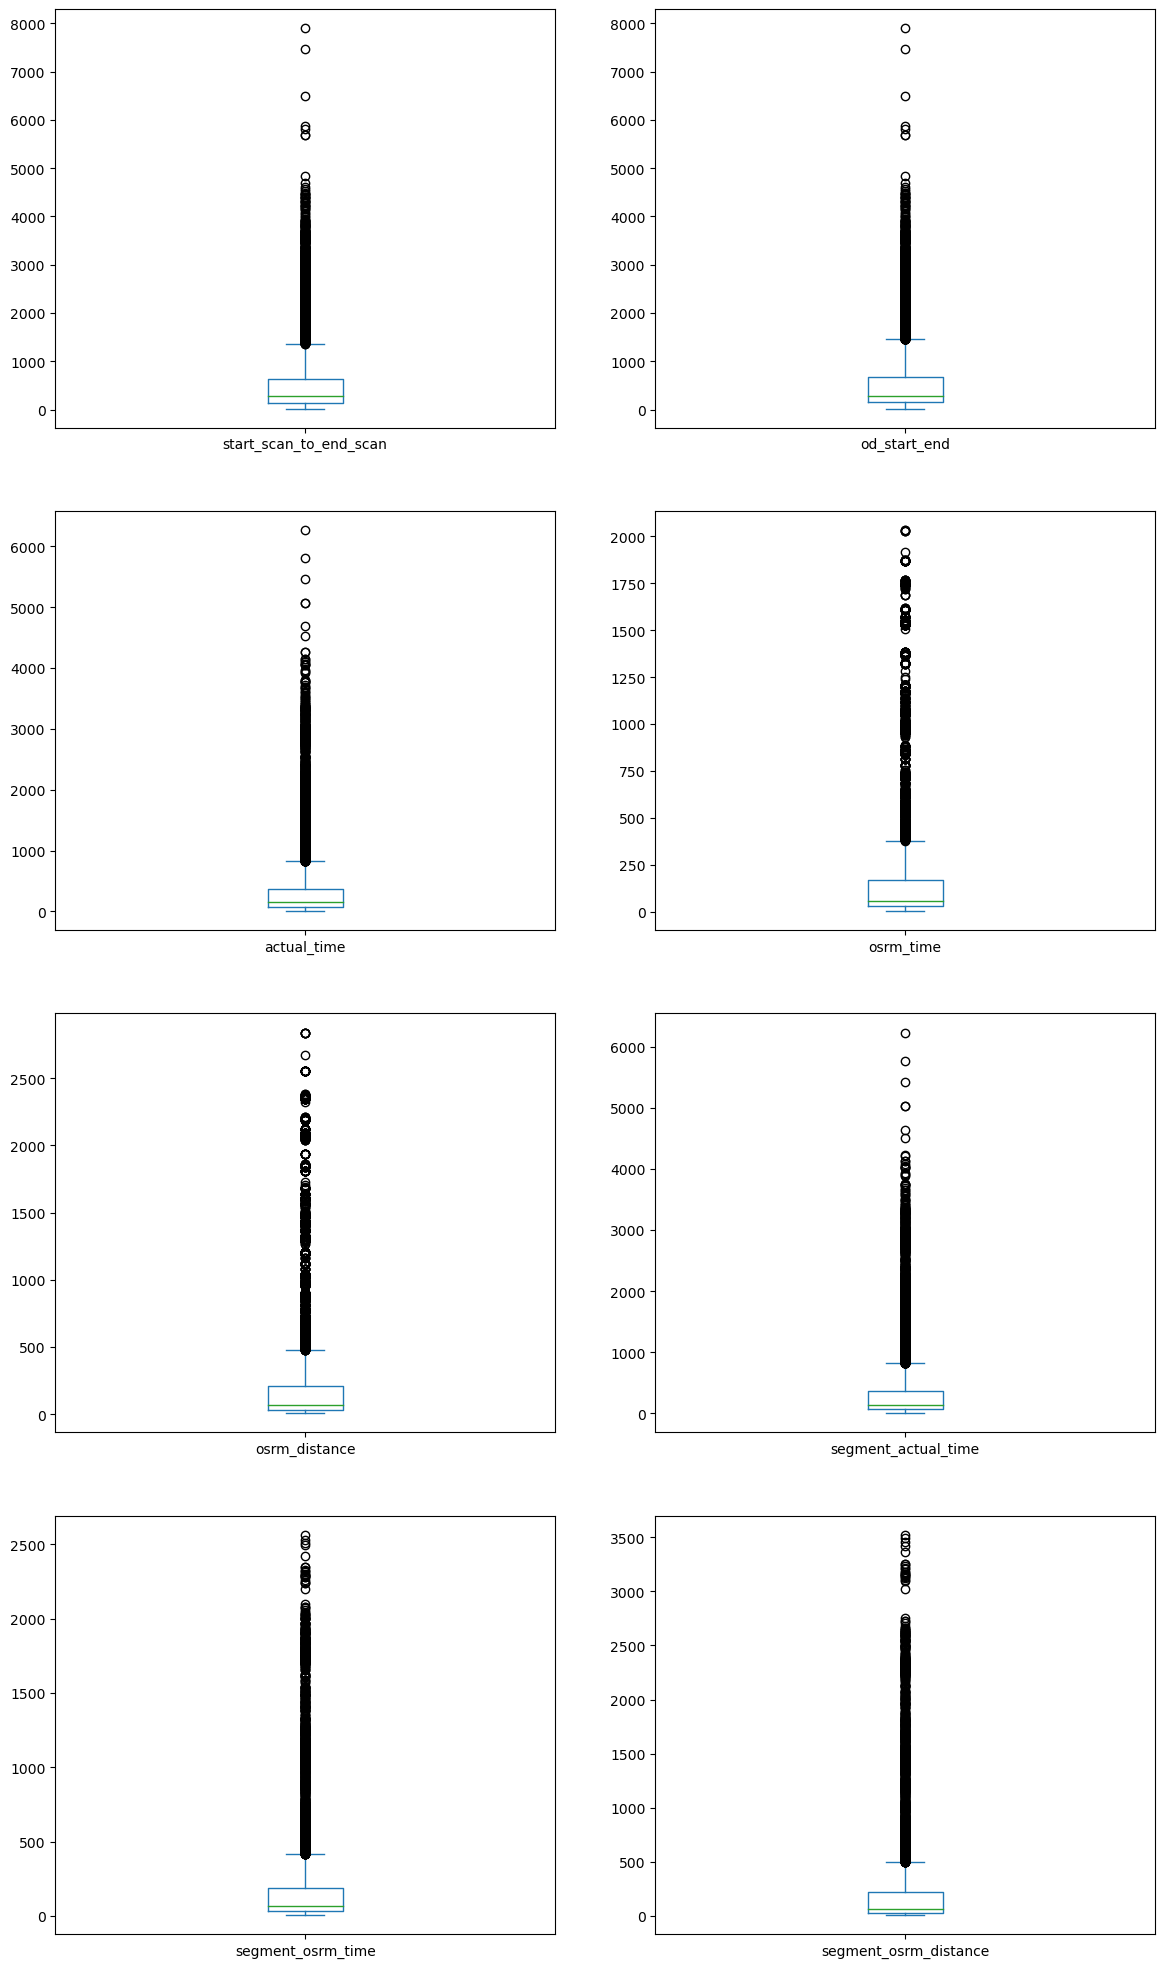

In [93]:
# distribution plot for continuous/ numerical variables
fig = plt.figure(figsize = (8,25))

fig.subplots_adjust(right = 1.5)

for plot in range(1,len(num_cols)+1):
    plt.subplot(4,2,plot)
    df1[num_cols[plot-1]].plot.box()

## Handling Outliers using IQR Method

In [94]:

data = df1.copy()  # copy the df1 to data to handle outliers as we do not need to remove outliers for df1
print("No. of rows : ", data.shape[0])

No. of rows :  14817


In [95]:

for col in num_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    data = data[(data[col]>(q1-1.5*iqr) ) & (data[col]<(q3+1.5*iqr))]
print("No. of rows : ", data.shape[0])

No. of rows :  9067


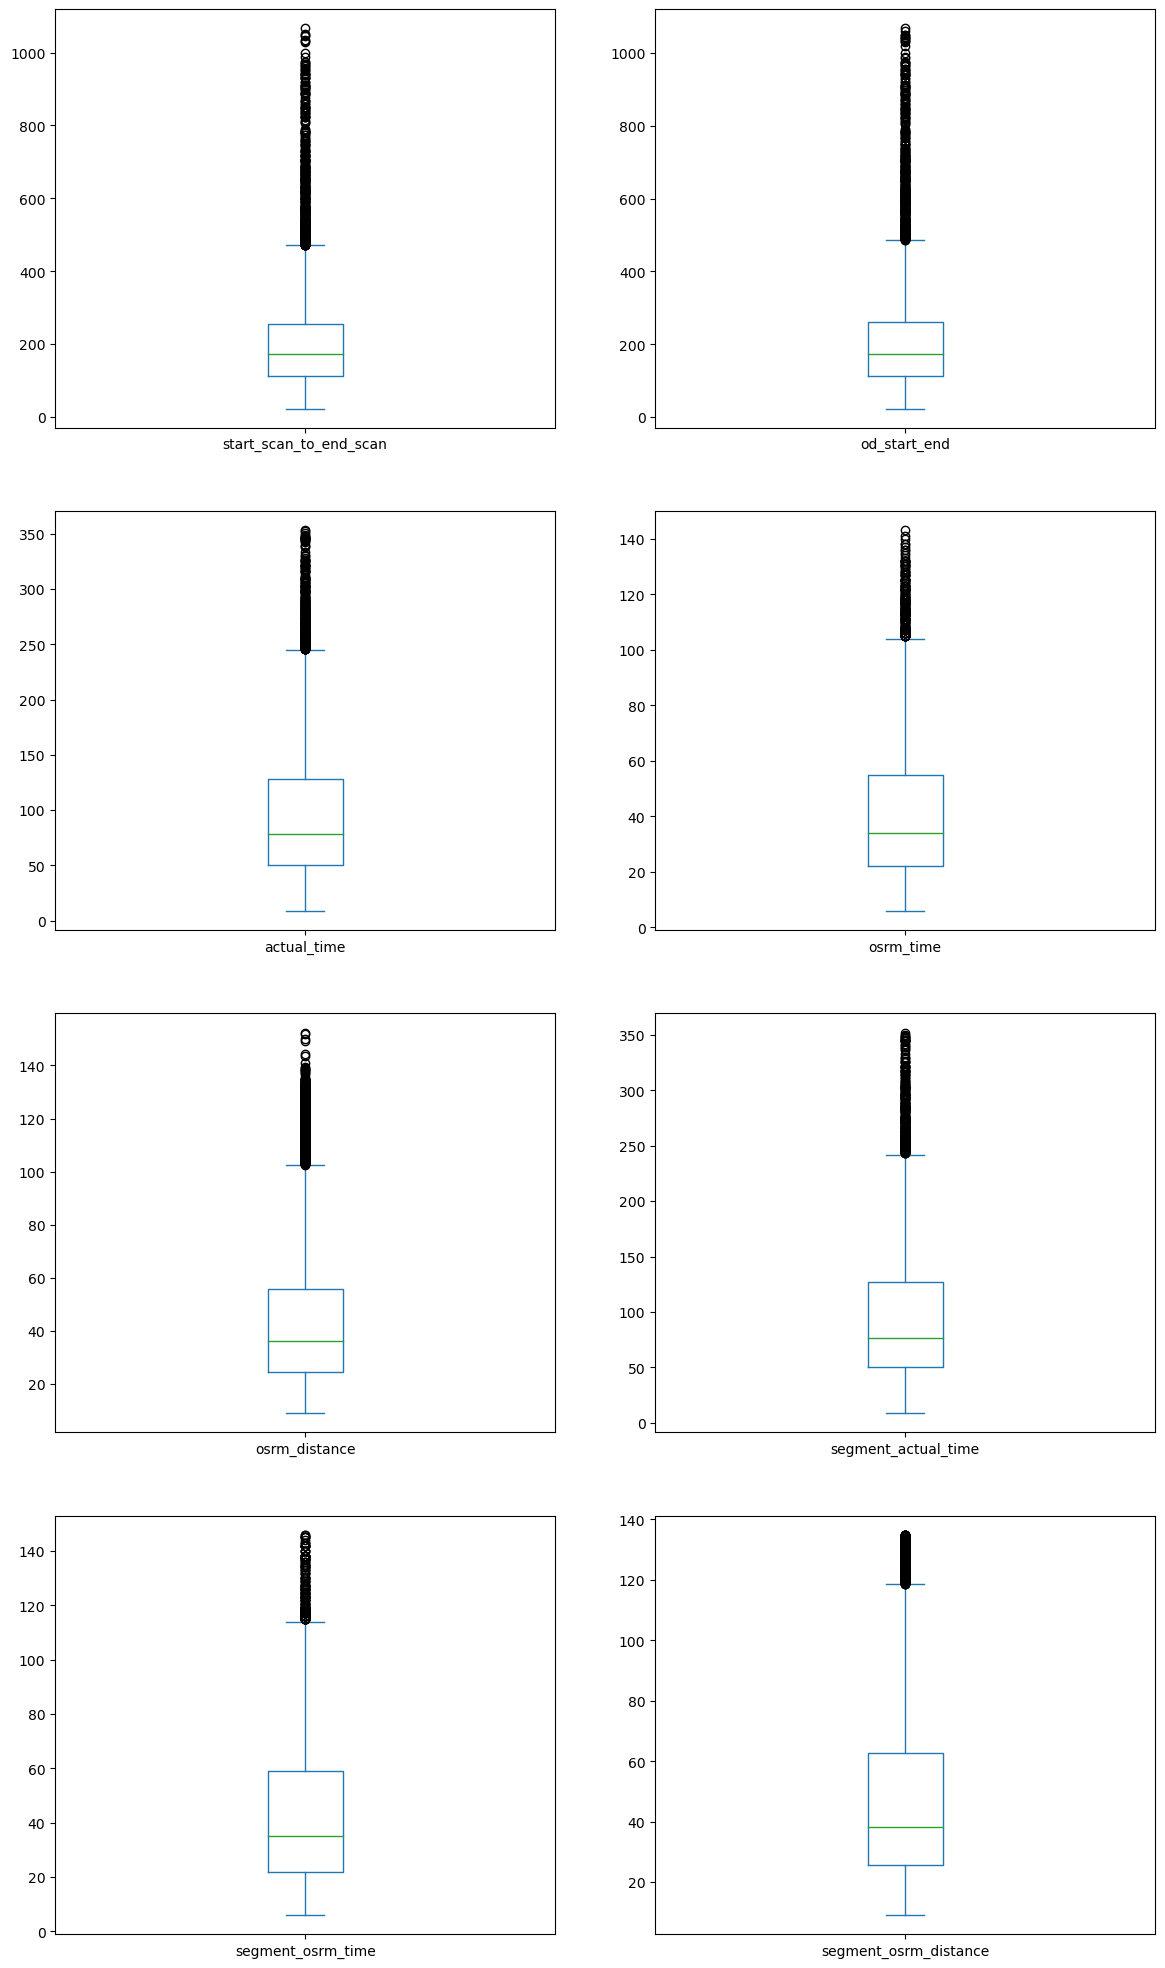

In [96]:
# distribution plot for continuous/ numerical variables
fig = plt.figure(figsize = (8,25))

fig.subplots_adjust(right = 1.5)

for plot in range(1,len(num_cols)+1):
    plt.subplot(4,2,plot)
    data[num_cols[plot-1]].plot.box()

**Observation**

We can see there are so many outliers present in this data. To deal with this, we can use different techniques like iqr method to remove these outliers but we will not remove the outliers in this data as outliers present are from time distance columns and there will be delivery packages where distance from source to distance can be close or far and to cover that distance the time taken would be also less or more.

## One-Hot Encoding

In [97]:
from sklearn.preprocessing import OneHotEncoder  # one hot encoding for categorical variable

In [98]:
# one-hot encoding for categorical variable - data
df1.data.value_counts()

training    10654
test         4163
Name: data, dtype: int64

In [99]:
one = OneHotEncoder()
df1['data'] = pd.DataFrame(one.fit_transform(np.array(df1['data']).reshape(-1,1)).toarray())[0]

In [100]:
df1.data.value_counts()

0.0    10654
1.0     4163
Name: data, dtype: int64

In [101]:
# one-hot encoding for categorical variable - route_type
df1.route_type.value_counts()

Carting    8908
FTL        5909
Name: route_type, dtype: int64

In [102]:
one = OneHotEncoder()
df1['route_type'] = pd.DataFrame(one.fit_transform(np.array(df1['route_type']).reshape(-1,1)).toarray())[0]

In [103]:
df1.route_type.value_counts()

1.0    8908
0.0    5909
Name: route_type, dtype: int64

## Column Normalization / Standardization

In [104]:
# column normalization for distance column

In [105]:
from sklearn.preprocessing import MinMaxScaler  # column normalization

In [106]:
distance = ['actual_distance_to_destination','osrm_distance','segment_osrm_distance']

In [107]:
for col in distance:
    min_max_scaler = MinMaxScaler()
    df1[col] = pd.DataFrame(min_max_scaler.fit_transform(np.array(df1[col]).reshape(-1,1)))

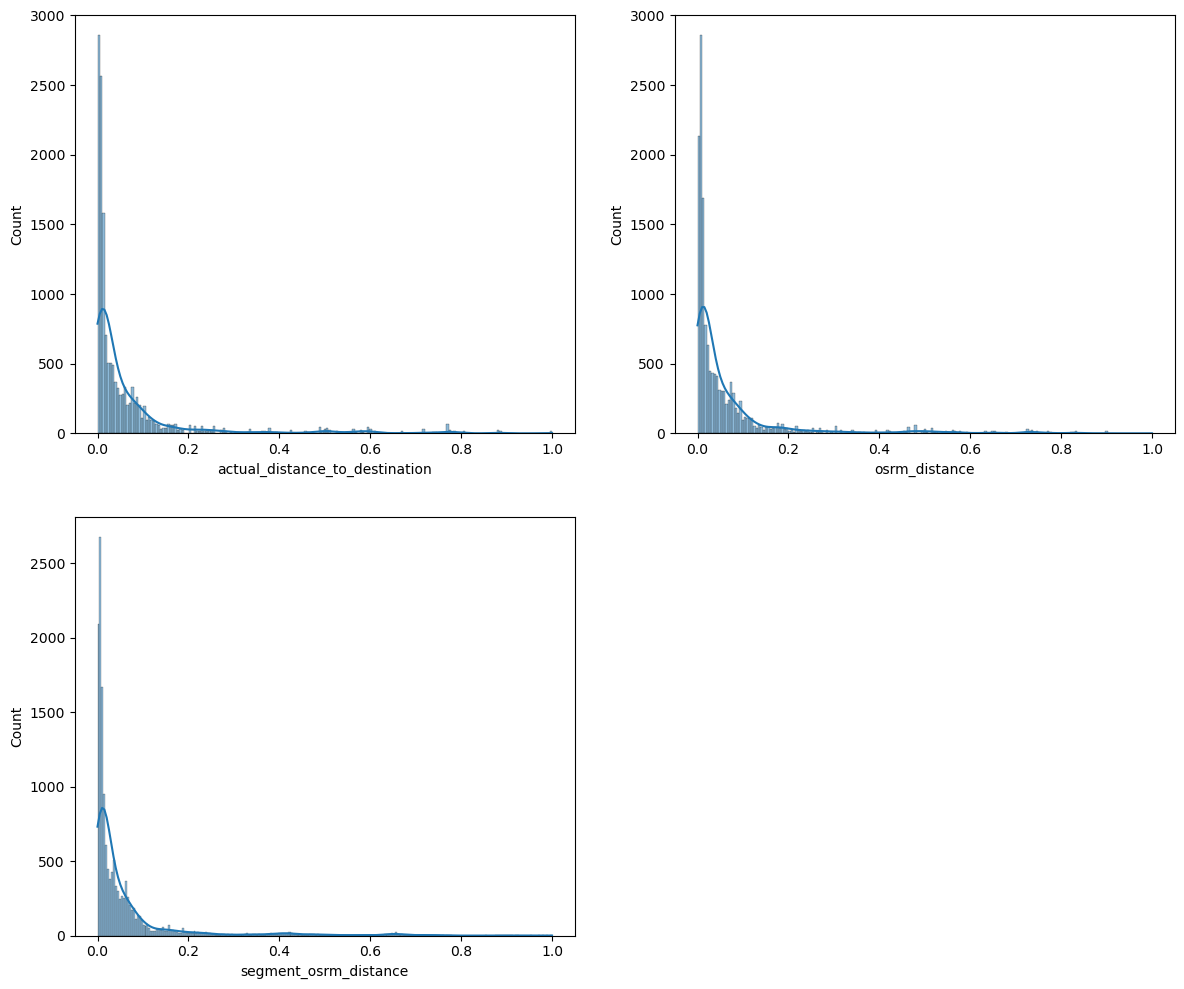

In [108]:
# distribution plot for continuous/ numerical variables using log
fig = plt.figure(figsize = (8,25))

fig.subplots_adjust(right = 1.5)

for plot in range(1,len(distance)+1):
    plt.subplot(4,2,plot)
    sns.histplot(df1[distance[plot-1]],
                kde=True)

In [109]:
# column standardization for time columns

In [110]:
time = ['start_scan_to_end_scan','actual_time','osrm_time','segment_actual_time','segment_osrm_time','od_start_end']

In [111]:
from sklearn.preprocessing import StandardScaler  # column standardization

In [112]:
for col in time:
    scaler = StandardScaler()
    df1[col] = pd.DataFrame(scaler.fit_transform(np.array(df1[col]).reshape(-1,1)))

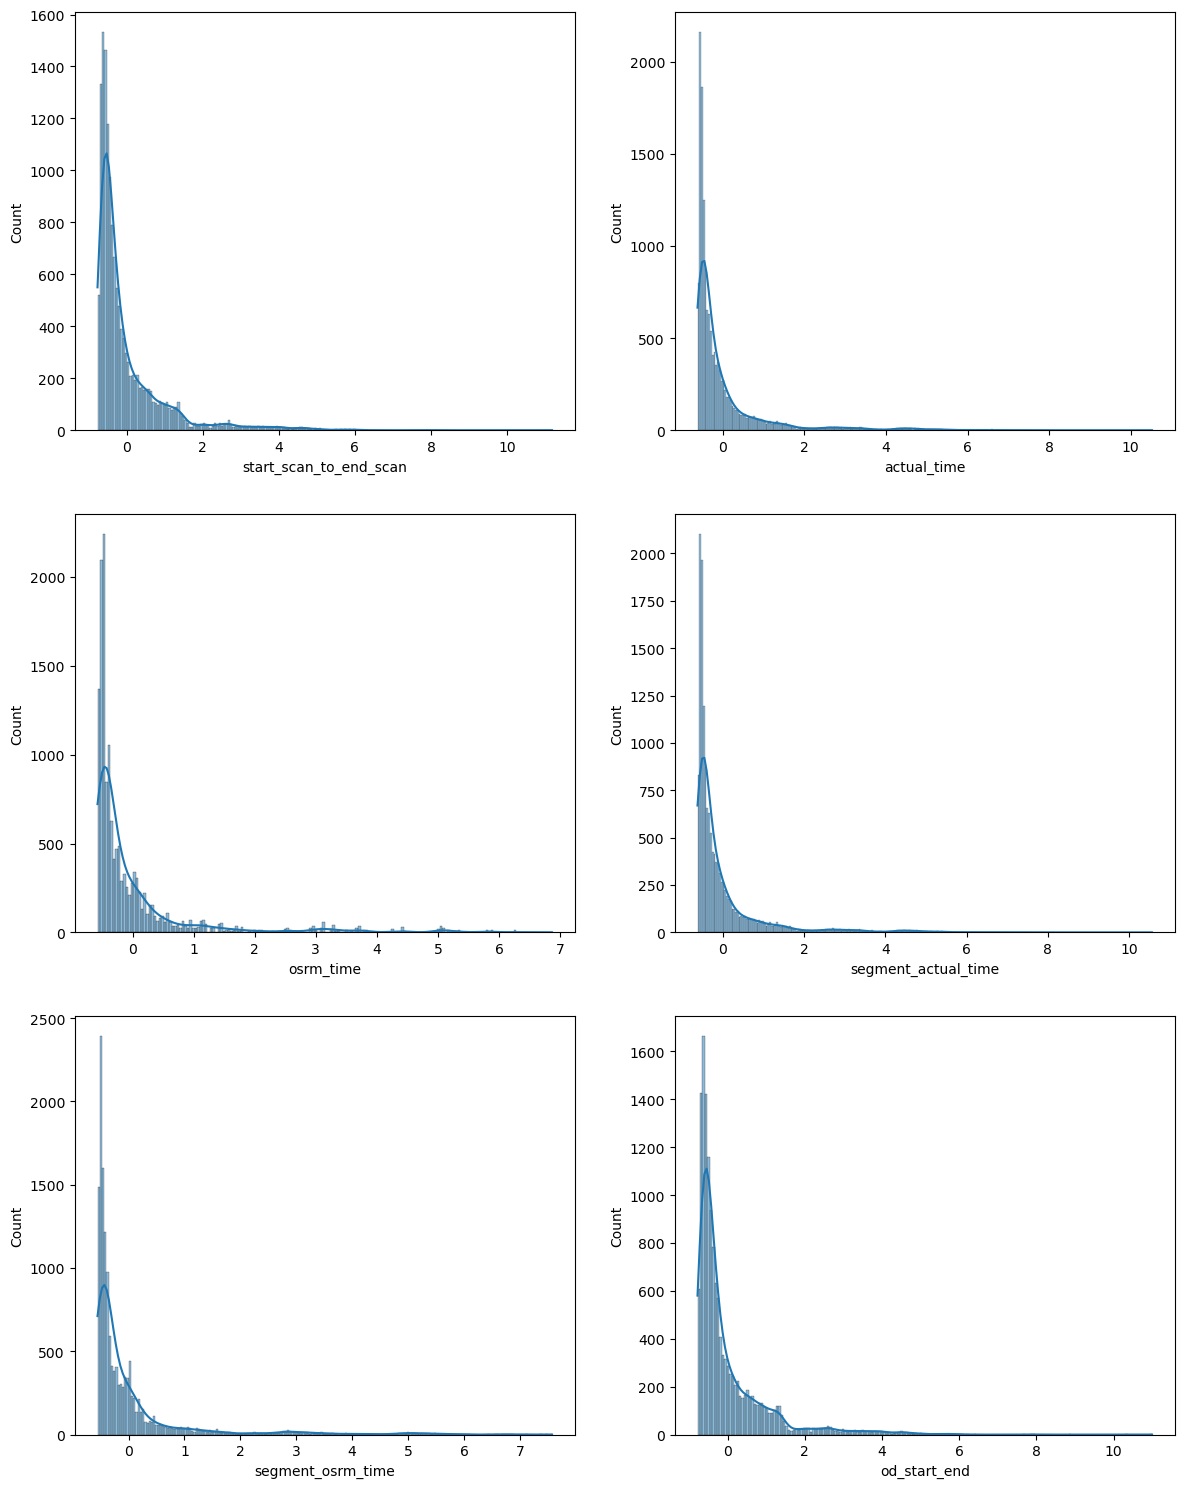

In [113]:
# distribution plot for continuous/ numerical variables using log
fig = plt.figure(figsize = (8,25))

fig.subplots_adjust(right = 1.5)

for plot in range(1,len(time)+1):
    plt.subplot(4,2,plot)
    sns.histplot(df1[time[plot-1]],
                kde=True)

In [114]:
df1.head()

,data,trip_uuid,route_type,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,...,destination_code,source_state,source_city,source_place,source_code,year,month,day,hour,od_start_end
0,1.0,trip-153800653897073708,1.0,IND424006AAA,IND424101AAA,-0.585732,0.020826,-0.408181,-0.444632,0.017121,...,D,Maharashtra,Dhule,MIDCAvdn,I,2018,9,27,Dawn,-0.601167
1,1.0,trip-153800654935210748,1.0,IND400072AAB,IND401104AAA,-0.682903,0.004027,-0.532875,-0.532771,0.004471,...,IP,Maharashtra,Mumbai Hub,Mumbai Hub,Mumbai Hub,2018,9,27,Dawn,-0.696885
2,1.0,trip-153800658820968126,0.0,IND302014AAA,IND000000ACB,0.120279,0.085857,-0.041227,0.003411,0.074804,...,HB,Rajasthan,Jaipur,Hub,Hub,2018,9,27,Dawn,0.094280
3,1.0,trip-153800659468028518,1.0,IND421302AAF,IND421302AAR,-0.647982,0.000090,-0.588096,-0.562151,0.000877,...,I,Maharashtra,Mumbai,Kalyan,Kalyan,2018,9,27,Dawn,-0.662486
4,1.0,trip-153800661729668086,1.0,IND395009AAA,IND395023AAD,-0.459712,0.002024,-0.401056,-0.532771,0.003218,...,I,Gujarat,Surat,Central,D,2018,9,27,Dawn,-0.477034


## Insights

- The data is for the year 2018 between September(9) and October(10) month.


- Night is the time when most number of trips(5024) were generated, followed by Dawn(4854).


- Maharashtra is the state from where most orders(2591) delivered then Karnataka(2275) followed by Harayana(1667). (Destination State)


- Bangalore is the city which has the most no. of orders placed(1702), then Mumbai(891),Gurgaon(869). (Destination cities)


- Most deliveries were originated from Bangalore, Gurgaon. (Source cities)


- Mid of the month (12-22) is the time when most trips were generated.


- Most Delivery were done through Carting transportation.


- Busiest Corridor with respect to total number of deliveries is Bangalore-Bangalore, followed by Hyderabad-Hyderabad-


- Busiest corridor with respect to average time taken is Guwahati-Bhiwandi, followed by bhiwandi-Guwahati then MAA-Gurgaon.


- Busiest corridor with respect to average distance is Guwahati-Bhiwandi, followed by bhiwandi-Guwahati then Bangalore-Chandigarh.


- There is a highly positive correlation between:

    - osrm_distance and osrm_time
    - segment_osrm_distance and segment_osrm_time


## Recommendations

- There is a difference in osrm time and actual time. The team can work on reducing this difference to provide customer accurate deliveries, which will improve the customer experience.

- Most orders were delivered to Maharashtra, Karnataka, Harayana. If the services in these regions can be improved or expanded to meet the high demands.

- There is a difference in osrm distance and actual distance covered. This may be causing delivery delays. 
